# Sign Language Gesture Recognition
-----------------------------------

## Introduction

> “You know, no amount of smiling at a flight of stairs has ever made it turn into a ramp. Never. Smiling at a television screen isn’t going to make closed captions appear for people who are deaf. No amount of standing in the middle of a bookshop and radiating a positive attitude is going to turn all those books into Braille,” ~ [Stella Young](https://epicassist.org/the-biggest-barrier-for-people-with-disability/).

###### Image example

In [171]:
! python --version

Python 3.10.9


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import animatplot as amp

In [7]:
x = np.load('./selected_dataset/asl/03634.npy')

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

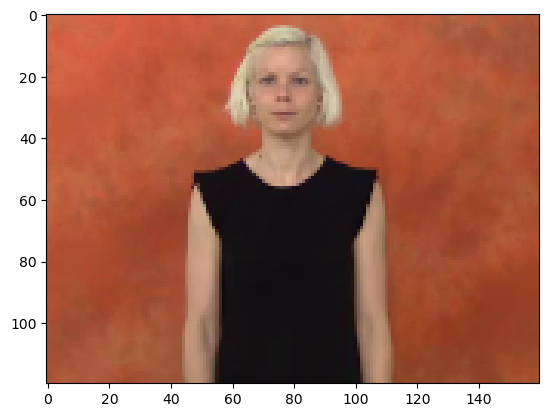

In [9]:
block = amp.blocks.Imshow(x)
anim = amp.Animation([block])
anim.save_gif('asl')

### ASL in ASL

![Asl sign in ASL](./asl.gif)

### Motivation 

Current world is far from perfect and just and many people are forced play it on a **hard mode**, not because of their physique, diversity, disabilities which they are having, but because of the barriers which society doesn't break down to make it more inclusing and accessible for all. Barriers which **can** be destroyed with the current technology.

One of such example is communication barrier for people with hearing impairments when doing errands, visiting offices, etc. when there is noone who knows Sign Language ([Source](https://www.cdc.gov/ncbddd/disabilityandhealth/disability-barriers.html)) . Of course it is always possible for them to write their massages but this style of communication is slower (can be compared to *half duplex* when there is only one side which can send information at the same time) than oral communication (*full duplex*, more nuanced, allowing speakers to exchange information live, simultanously).

![Explaination of half and full duplex](duplex.jpg)

Inspired by Microsoft Inlusive Design we propose a simple solution which could allow for people with hearing problem to communicate more freely with people who don’t know Sign Language.

- [Microsoft - Inclusive design](https://www.microsoft.com/design/inclusive/)
- [Microsoft - Gaming for everyone](https://news.microsoft.com/gamingforeveryone/)

Communication model:

![Communication diagram, two people, one sends sign language to AI model which gives as an output text, other sends voice to AI model which gives as an output text](diag.png)

Recognizing gestures from American Sign Language (Sign Language -> Text) as well as speech recognition (Speech -> text) 

Because there are already [libraries](https://pypi.org/project/SpeechRecognition/) and solutions which deal with speech recognition we will foremost focus on the first part of the communication.


### Dataset

[WLASL (World Level American Sign Language) Video](https://www.kaggle.com/datasets/risangbaskoro/wlasl-processed)
- largest video dataset found by author
- 12 000 processed videos
- 2000 most common words
- "*Most existing sign language datasets are limited to a small number of words. Due to the limited vocabulary size, models learned from those datasets cannot be applied in practice. In this paper, we introduce a new large-scale Word-Level American Sign Language (WLASL) video dataset, containing more than 2000 words performed by over 100 signers.*" ~ [WLASL Scientfic Paper](https://arxiv.org/abs/1910.11006)
- "*66% at top-10 accuracy on 2,000 words/glosses*"  ~ [WLASL Scientfic Paper](https://arxiv.org/abs/1910.11006)
- Very difficult task, relatively new (from 2019)
- Current State-of-the-Art model achieves 58% TOP-1 accuracy

### How challenging is the topic?

#### Language consists of thousands of signs, gesture recognition tasks can handle at most houndreds categories

> The vocabulary of signs in daily use is large and usually in the magnitude of thousands. In contrast, related tasks such as gesture recognition and action recognition  only contains at most a
few hundred categories. This greatly challenges the
scalability of recognition methods

Source: Li, Dongxu, Cristian Rodriguez Opazo, Xin Yu, and Hongdong Li. “Word-Level Deep Sign Language Recognition from Video: A New Large-Scale Dataset and Methods Comparison,” October 24, 2019. [https://doi.org/10.48550/arXiv.1910.11006](https://doi.org/10.48550/arXiv.1910.11006).

#### Signs similarity

![Read and dance signs](./read_dance.png)
Source: Li, Dongxu, Cristian Rodriguez Opazo, Xin Yu, and Hongdong Li. “Word-Level Deep Sign Language Recognition from Video: A New Large-Scale Dataset and Methods Comparison,” October 24, 2019. [https://doi.org/10.48550/arXiv.1910.11006](https://doi.org/10.48550/arXiv.1910.11006).

#### Few signs can have same gesture
![Signs ambiguity](./ambiguity.png)
Source: Li, Dongxu, Cristian Rodriguez Opazo, Xin Yu, and Hongdong Li. “Word-Level Deep Sign Language Recognition from Video: A New Large-Scale Dataset and Methods Comparison,” October 24, 2019. [https://doi.org/10.48550/arXiv.1910.11006](https://doi.org/10.48550/arXiv.1910.11006).

#### Same word can have few signs
![Drink - 1st sign](./drink1.gif)

![Drink - 2nd sign](./drink2.gif)
Both signs mean "to drink"

#### Data diversity
![Data diversity](./data_diversity.png)
Source: Li, Dongxu, Cristian Rodriguez Opazo, Xin Yu, and Hongdong Li. “Word-Level Deep Sign Language Recognition from Video: A New Large-Scale Dataset and Methods Comparison,” October 24, 2019. [https://doi.org/10.48550/arXiv.1910.11006](https://doi.org/10.48550/arXiv.1910.11006).

#### Terra nova, terra incognita

The best models didn't yet achieved high accuracy.

![Best State-of-the-Art models](top1.png)
Source: [https://paperswithcode.com/sota/sign-language-recognition-on-wlasl-2000](https://paperswithcode.com/sota/sign-language-recognition-on-wlasl-2000)

![Benchmark](benchmark.png)
Source: Li, Dongxu, Cristian Rodriguez Opazo, Xin Yu, and Hongdong Li. “Word-Level Deep Sign Language Recognition from Video: A New Large-Scale Dataset and Methods Comparison,” October 24, 2019. [https://doi.org/10.48550/arXiv.1910.11006](https://doi.org/10.48550/arXiv.1910.11006).

## Proposal

![Models](models.png)

Source: Li, Dongxu, Cristian Rodriguez Opazo, Xin Yu, and Hongdong Li. “Word-Level Deep Sign Language Recognition from Video: A New Large-Scale Dataset and Methods Comparison,” October 24, 2019. [https://doi.org/10.48550/arXiv.1910.11006](https://doi.org/10.48550/arXiv.1910.11006).

Based on the base architecture proposed by the authors of the dataset paper we selected two which we wanted to try.

 - Image analysis using 2D Convolutional Neural Networks. (similar to the "a" from above figure)
 - Pose recognition using Recurrent Neural Networks (RNN) - contrary to the authors who used Gated Recurrent Unit (GRU) we selected Long Short-Term Memory (LSTM) (similar to the "c" from above figure)


## Loading dataset

To get our dataset we first need to download official kaggle API library via Python package manager (pip)

In [9]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


We must generate json token and place it in the folder of our project

> In order to use the Kaggle’s public API, you must first authenticate using an API token. From the site header, click on your user profile picture, then on “My Account” from the dropdown menu. This will take you to your account settings at https://www.kaggle.com/account. Scroll down to the section of the page labelled API:

> To create a new token, click on the “Create New API Token” button. This will download a fresh authentication token onto your machine.

> If you are using the Kaggle CLI tool, the tool will look for this token at ~/.kaggle/kaggle.json on Linux, OSX, and other UNIX-based operating systems, and at C:\Users<Windows-username>.kaggle\kaggle.json on Windows. If the token is not there, an error will be raised. Hence, once you’ve downloaded the token, you should move it from your Downloads folder to this folder.

> If you are using the Kaggle API directly, where you keep the token doesn’t matter, so long as you are able to provide your credentials at runtime.

[Kaggle API - documentation](https://www.kaggle.com/docs/api)

In [25]:
!dir

 Volume in drive D is DATA
 Volume Serial Number is 18E2-2529

 Directory of D:\GitHub\sign_language_gesture_recognition\sign_language_gesture_recognition

09.12.2022  11:46    <DIR>          .
09.12.2022  11:46    <DIR>          ..
09.12.2022  11:05                68 .gitattributes
09.12.2022  11:05             2ÿ951 .gitignore
09.12.2022  11:05           270ÿ900 asl.gif
09.12.2022  11:46         1ÿ839ÿ641 asl_gesture_recognition.ipynb
09.12.2022  11:05            67ÿ519 book.gif
09.12.2022  11:05             9ÿ709 diag.png
09.12.2022  11:05            24ÿ069 duplex.jpg
09.12.2022  11:05           166ÿ602 features_df.csv
09.12.2022  11:42                73 kaggle.json
09.12.2022  11:05    <DIR>          keys_dataset
09.12.2022  11:05    <DIR>          letters_dataset
09.12.2022  11:05    <DIR>          letter_keys_dataset
09.12.2022  11:05            11ÿ525 LICENSE
09.12.2022  11:05    <DIR>          l_keys_dataset
09.12.2022  11:05            92ÿ224 moving.png
09.12.2022  11:05      

We modify the access to the file so other users of the system cannot use it (security reason, without it when importing kaggle we will get a warning)

In [13]:
! chmod 600 ./sign_language_gesture_recognition/kaggle.json # command to change access to the file on Linux

'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import os

We must modify environmental variable to specify where Kaggle should look for json token (We set it to current directory).

In [27]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [28]:
import kaggle

After successful importing of the API, we can download our dataset.

In [29]:
!kaggle datasets download -d risangbaskoro/wlasl-processed


  0%|          | 0.00/4.82G [00:00<?, ?B/s]
  0%|          | 1.00M/4.82G [00:00<42:32, 2.03MB/s]
  0%|          | 2.00M/4.82G [00:00<37:04, 2.33MB/s]
  0%|          | 3.00M/4.82G [00:01<29:32, 2.92MB/s]
  0%|          | 4.00M/4.82G [00:01<23:33, 3.66MB/s]
  0%|          | 5.00M/4.82G [00:01<20:31, 4.20MB/s]
  0%|          | 6.00M/4.82G [00:01<18:35, 4.63MB/s]
  0%|          | 7.00M/4.82G [00:01<17:37, 4.89MB/s]
  0%|          | 8.00M/4.82G [00:02<16:36, 5.19MB/s]
  0%|          | 9.00M/4.82G [00:02<15:51, 5.43MB/s]
  0%|          | 10.0M/4.82G [00:02<15:26, 5.58MB/s]
  0%|          | 11.0M/4.82G [00:02<15:10, 5.67MB/s]
  0%|          | 12.0M/4.82G [00:02<15:52, 5.42MB/s]
  0%|          | 13.0M/4.82G [00:02<15:24, 5.59MB/s]
  0%|          | 14.0M/4.82G [00:03<15:49, 5.44MB/s]
  0%|          | 15.0M/4.82G [00:03<15:12, 5.66MB/s]
  0%|          | 16.0M/4.82G [00:03<14:53, 5.78MB/s]
  0%|          | 17.0M/4.82G [00:03<15:01, 5.72MB/s]
  0%|          | 18.0M/4.82G [00:03<15:36, 5.51MB/s]
 

We must unzip the dataset

In [3]:
# unzip
import zipfile, os

path_to_zip = './wlasl-processed.zip'
dst_path = './dataset'

if not os.path.exists(dst_path):
  os.makedirs(dst_path)
  with zipfile.ZipFile(path_to_zip, 'r') as file:
    file.extractall(dst_path)

## Data preprocessing based on [source](https://www.kaggle.com/code/azizmousa/wlas-df-json-extraction)
To deal with the dataset CSV files we will used pandas library.

In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\GitHub\sign_language_gesture_recognition\sign\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
wlas_df = pd.read_json(os.path.join(dst_path,'WLASL_v0.3.json'))

In [6]:
print(wlas_df)

           gloss                                          instances
0           book  [{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...
1          drink  [{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...
2       computer  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
3         before  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
4          chair  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
...          ...                                                ...
1995  washington  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
1996   waterfall  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
1997       weigh  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
1998  wheelchair  [{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f...
1999     whistle  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...

[2000 rows x 2 columns]


## Data Preprocessing

We must extract videos id to make it easier to process the data.

In [7]:
def get_videos_ids(json_list):
    """
    function to check if the video id is available in the dataset
    and return the videos ids of the current instance
    
    input: instance json list
    output: list of videos_ids
    
    """
    videos_list = []    
    for ins in json_list:
        video_id = ins['video_id']
        if os.path.exists(f'./dataset/videos/{video_id}.mp4'):
            videos_list.append(video_id)
    return videos_list

In [8]:
def get_json_features(json_list):
    """
    function to check if the video id is available in the dataset
    and return the videos ids or any other feature of the current instance
    
    input: instance json list
    output: list of videos_ids
    
    """
    videos_ids = []
    for ins in json_list:
        video_id = ins['video_id']
        if os.path.exists(f'./dataset/videos/{video_id}.mp4'):
            videos_ids.append(video_id)
    return videos_ids

In [9]:
wlas_df['videos_ids'] = wlas_df['instances'].apply(get_videos_ids)

In [10]:
wlas_df

,gloss,instances,videos_ids
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...","[69241, 07069, 07068, 07070, 07099, 07074]"
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...","[69302, 65539, 17710, 17733, 65540, 17734, 177..."
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[12328, 12312, 12311, 12338, 12313, 12314, 123..."
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[05728, 05749, 05750, 05729, 05730, 65167, 057..."
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[09848, 09869, 09849, 09850, 09851, 65328, 09854]"
...,...,...,...
1995,washington,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[62393, 62394, 62395, 62396, 62398]"
1996,waterfall,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[62488, 62489, 62490, 62492, 62493]"
1997,weigh,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[62782, 62783, 62785]"
1998,wheelchair,"[{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f...","[63044, 63046, 63047, 63050]"


In [11]:
features_df = pd.DataFrame(columns=['gloss', 'video_id'])
for row in wlas_df.iterrows():
    ids = get_json_features(row[1][1])
    word = [row[1][0]] * len(ids)
    df = pd.DataFrame(list(zip(word, ids)), columns = features_df.columns)
    features_df = features_df.append(df, ignore_index=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8768\3174444598.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(df, ignore_index=True)


We transform our CSV file to contain only two columns
1. Gloss (what word sign shows)
2. Corresponding video id

In [12]:
features_df

,gloss,video_id
0,book,69241
1,book,07069
2,book,07068
3,book,07070
4,book,07099
...,...,...
11975,wheelchair,63047
11976,wheelchair,63050
11977,whistle,63186
11978,whistle,63188


In [41]:
features_df.to_csv('features_df.csv', index=False)

### Dataset analysis

We want to know how many samples each word in the dataset has. For that we apply `len` function to the videos id and we group them by the gloss.

In [53]:
wlas_df['samples_num'] = wlas_df['videos_ids'].apply(len)

In [54]:
words_sample_counts = wlas_df[['gloss', 'samples_num']].groupby('samples_num').agg({"gloss":['count', ', '.join]})

In [59]:
words_sample_counts

gloss                                                   
            count                                               join
samples_num                                                         
2              14  gloves, careless, wash face, curtain, grey, la...
3              76  garage, parents, boots, excuse, furniture, rep...
4             335  hello, newspaper, asl, that, will, cards, hate...
5             511  clothes, table, movie, clock, pencil, behind, ...
6             402  book, birthday, need, have, knife, read, name,...
7             307  chair, dance, eat, forget, but, jacket, paint,...
8             151  all, blue, hearing, wrong, color, enjoy, time,...
9             100  fine, finish, now, can, hat, kiss, cow, meet, ...
10             48  year, black, hot, like, many, orange, fish, gr...
11             26  deaf, no, walk, mother, woman, dog, family, ap...
12             13  yes, what, later, man, shirt, change, corn, da...
13              8  candy, thanksgiving, bed, bowling, tall, accid...
14              4                        computer, who, cousin, help
15              2                                          drink, go
16              3                                 before, thin, cool

Let's visualize this

In [33]:
bins = [i for i in range(2,17)]

In [34]:
counts = [14, 76, 335, 511, 402, 307, 151, 100, 48, 26, 13, 8, 4, 2, 3]

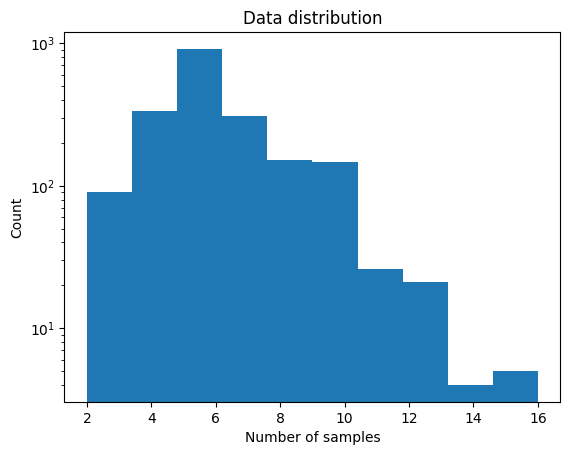

In [35]:
import matplotlib.pyplot as plt
plt.hist(bins, weights=counts, log=True)
plt.ylabel('Count')
plt.xlabel('Number of samples')
plt.title('Data distribution')
plt.show()

Mode of the dataset is equal to 6 samples per one word. It is a very small number, making it difficult for neural network to learn.

## Feature extraction based on [source](https://www.youtube.com/watch?v=doDUihpj6ro)

Now we can start feature extraction once we have our data in the format we wanted.

### Virtual environment setup (FAILED)

In [31]:
conda create -y --name asl

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/asl



Preparing transaction: done
Verifying transaction: done
Executing transaction: done
#
# To activate this environment, use
#
#     $ conda activate asl
#
# To deactivate an active environment, use
#
#     $ conda deactivate

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
ls -l /opt/conda/envs

total 4
drwxr-xr-x 3 jupyter jupyter 4096 Nov 26 14:23 asl/


In [3]:
%conda activate /opt/conda/envs/asl


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.



Note: you may need to restart the kernel to use updated packages.


In [1]:
conda --version

conda 22.9.0

Note: you may need to restart the kernel to use updated packages.


In [6]:
!python -m ipykernel install --user --name=asl

Installed kernelspec asl in /home/jupyter/.local/share/jupyter/kernels/asl


In [11]:
! conda env list

# conda environments:
#
base                  *  /opt/conda
asl                      /opt/conda/envs/asl



In [37]:
conda init --help

usage: conda init [-h] [--all] [--user] [--no-user] [--system] [--reverse]
                  [--json] [-v] [-q] [-d]
                  [shells [shells ...]]

Initialize conda for shell interaction.

Options:

positional arguments:
  shells         One or more shells to be initialized. If not given, the
                 default value is 'bash' on unix and 'cmd.exe' on Windows. Use
                 the '--all' flag to initialize all shells. Currently
                 compatible shells are {bash, fish, powershell, tcsh, xonsh,
                 zsh}.

optional arguments:
  -h, --help     Show this help message and exit.
  --all          Initialize all currently available shells.
  -d, --dry-run  Only display what would have been done.

setup type:
  --user         Initialize conda for the current user (default).
  --no-user      Don't initialize conda for the current user (default).
  --system       Initialize conda for all users on the system.
  --reverse      Undo effects of last conda i

In [16]:
conda init bash

no change     /opt/conda/condabin/conda
no change     /opt/conda/bin/conda
no change     /opt/conda/bin/conda-env
no change     /opt/conda/bin/activate
no change     /opt/conda/bin/deactivate
no change     /opt/conda/etc/profile.d/conda.sh
no change     /opt/conda/etc/fish/conf.d/conda.fish
no change     /opt/conda/shell/condabin/Conda.psm1
no change     /opt/conda/shell/condabin/conda-hook.ps1
no change     /opt/conda/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /opt/conda/etc/profile.d/conda.csh
no change     /home/jupyter/.bashrc
No action taken.

Note: you may need to restart the kernel to use updated packages.


In [20]:
%%bash
eval "$(conda shell.bash hook)" # copy conda command to shell
conda activate asl
conda env list

# conda environments:
#
base                     /opt/conda
asl                   *  /opt/conda/envs/asl



In [19]:
! conda env list

# conda environments:
#
base                  *  /opt/conda
asl                      /opt/conda/envs/asl



Google Cloud cannot into conda virtual environments...

[Source](https://stackoverflow.com/questions/62610289/conda-activate-and-conda-init-fail-to-work-in-colab-as-per-june-2020)

### Installing required libraries

In [48]:
pip install ffmpeg-python

     -------------------------------------- 829.2/829.2 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for future: started
  Running setup.py install for future: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: future is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [49]:
pip install opencv-python

     --------------------------------------- 35.6/35.6 MB 28.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [50]:
pip install opencv-contrib-python

     --------------------------------------- 42.5/42.5 MB 34.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [18]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [11]:
! python3 -m pip list

Package               Version
--------------------- --------
absl-py               1.3.0
attrs                 22.1.0
contourpy             1.0.6
cycler                0.11.0
flatbuffers           22.12.6
fonttools             4.38.0
kiwisolver            1.4.4
matplotlib            3.6.2
mediapipe             0.9.0.1
numpy                 1.23.5
opencv-contrib-python 4.6.0.66
packaging             22.0
Pillow                9.3.0
protobuf              3.20.3
pyparsing             3.0.9
python-dateutil       2.8.2
six                   1.16.0


For some reason in Pycharm's Jupiter Notebook implementation it was impossible to install mediapipe library with pip command. For that we had to install it from Python's Interpreter Settings.

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

In [37]:
! python -m pip install --upgrade pip

In [2]:
print(cv2.getBuildInformation())


General configuration for OpenCV 4.6.0 =====================================
  Version control:               4.6.0

  Extra modules:
    Location (extra):            D:/a/opencv-python/opencv-python/opencv_contrib/modules
    Version control (extra):     4.6.0

  Platform:
    Timestamp:                   2022-06-07T10:18:33Z
    Host:                        Windows 10.0.17763 AMD64
    CMake:                       3.22.5
    CMake generator:             Visual Studio 14 2015
    CMake build tool:            MSBuild.exe
    MSVC:                        1900
    Configuration:               Debug Release

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (16 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      FP16 (0 files):            + SSSE

### First approach to the dataset (Experiment)

Before building the pipeline we experimented with the dataset.

In [3]:
videos_path = './dataset/videos/'

In [4]:
video_file_path = os.path.join(videos_path, '00335.mp4')

In [5]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, mp_drawing.DrawingSpec(color=(255,255,255), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(255,255,255), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, mp_drawing.DrawingSpec(color=(255,255,255), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(255,255,255), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(255,255,255), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(255,255,255), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(255,255,255), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(255,255,255), thickness=1, circle_radius=1))


In [26]:
def holistic_adnotation(file_path):
    frames = []
    holistics = []
    res = []
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        cap = cv2.VideoCapture(file_path, cv2.CAP_FFMPEG)
        if not cap.isOpened():
            cap = cv2.VideoCapture(-1)
            if not cap.isOpened():
                raise IOError("Cannot open webcam")
            cap = cv2.VideoCapture(file_path, cv2.CAP_FFMPEG)
            if not cap.isOpened():
                raise IOError("Cannot open webcam")
                
        number_of_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        for i in range(int(number_of_frames)):
            ret, frame = cap.read()
            if ret:
                image, results = mediapipe_detection(frame, holistic)
                frames.append(image)
                res.append(results)
                img_with_landmarks = image.copy()
                landmarks = draw_landmarks(img_with_landmarks, results)
                holistics.append(img_with_landmarks)
        cap.release()
        cv2.destroyAllWindows()
    frames = np.array(frames)
    holistics = np.array(holistics)
    return frames, holistics, res

In [27]:
frames, holistics, results = holistic_adnotation(video_file_path)

In [16]:
frames.shape

(58, 240, 320, 3)

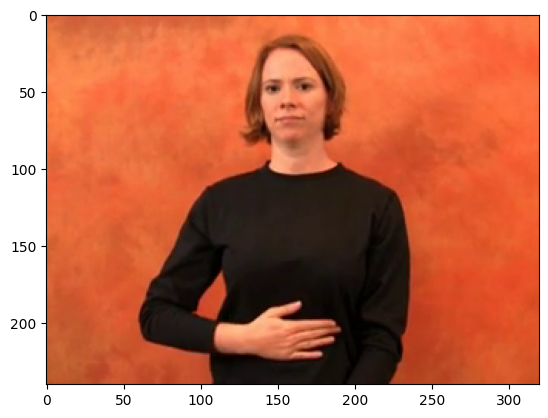

In [12]:
plt.imshow(frames[30,:,:,::-1])

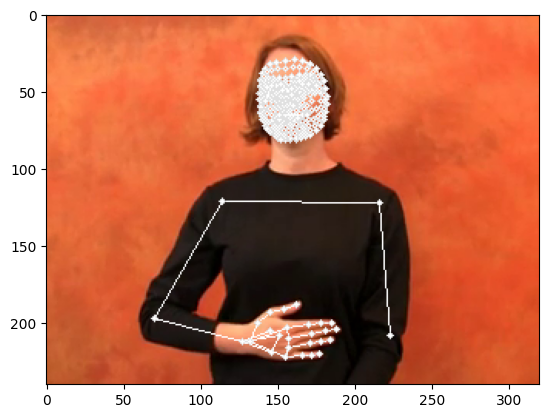

In [13]:
plt.imshow(holistics[30,:,:,::-1])

We can see in image that the right hand is visible. Let's check if our mediapipeline also see it

In [32]:
results[30].right_hand_landmarks

landmark {
  x: 0.41452938318252563
  y: 0.8865870237350464
  z: 1.604073531780159e-07
}
landmark {
  x: 0.4300839602947235
  y: 0.836873471736908
  z: -0.010692485608160496
}
landmark {
  x: 0.4552094340324402
  y: 0.8068446516990662
  z: -0.018084591254591942
}
landmark {
  x: 0.4839867353439331
  y: 0.7961968779563904
  z: -0.023912804201245308
}
landmark {
  x: 0.5077955722808838
  y: 0.7869106531143188
  z: -0.029138492420315742
}
landmark {
  x: 0.4896628260612488
  y: 0.8478094339370728
  z: -0.017800288274884224
}
landmark {
  x: 0.5331395268440247
  y: 0.8404781818389893
  z: -0.027793671935796738
}
landmark {
  x: 0.5587810277938843
  y: 0.8363742828369141
  z: -0.03424983471632004
}
landmark {
  x: 0.5783591866493225
  y: 0.8343583345413208
  z: -0.037742648273706436
}
landmark {
  x: 0.4934552013874054
  y: 0.8773529529571533
  z: -0.01806659996509552
}
landmark {
  x: 0.5382173657417297
  y: 0.8641901016235352
  z: -0.02568989060819149
}
landmark {
  x: 0.5665369033813477


### Different number of frames, different size

In [17]:
import pandas as pd
import os

features_path = '.'
videos_path = './dataset/videos/'
f_df = pd.read_csv(os.path.join(features_path, 'features_df.csv'))

In [38]:
for video_id in f_df[f_df['gloss']=='book'].video_id.to_list():
    video_id = str(video_id).zfill(5) # Files have 5 digits so if file id is 1000 we must pad to 01000
    video_file_path = os.path.join(videos_path, f'{video_id}.mp4')
    print(video_file_path)
    frames,_, res = holistic_adnotation(video_file_path)
    print(frames.shape)
    num_of_frames = frames.shape[0]
    for i in range(num_of_frames):
        r = res[i].right_hand_landmarks
        if r is None:
            print(f'No right hand in {i} frame')
        l = res[i].left_hand_landmarks
        if l is None:
            print(f'No left hand in {i} frame')
    break

./dataset/videos/69241.mp4
(75, 720, 1280, 3)
No right hand in 0 frame
No left hand in 0 frame
No right hand in 1 frame
No left hand in 1 frame
No right hand in 2 frame
No left hand in 2 frame
No right hand in 3 frame
No left hand in 3 frame
No right hand in 4 frame
No left hand in 4 frame
No right hand in 5 frame
No left hand in 7 frame
No left hand in 8 frame
No left hand in 17 frame
No right hand in 18 frame
No right hand in 19 frame
No right hand in 20 frame
No right hand in 21 frame
No right hand in 22 frame
No left hand in 27 frame
No right hand in 28 frame
No right hand in 31 frame
No right hand in 32 frame
No left hand in 32 frame
No right hand in 33 frame
No right hand in 34 frame
No right hand in 35 frame
No right hand in 37 frame
No right hand in 40 frame
No right hand in 49 frame
No right hand in 50 frame
No right hand in 51 frame
No left hand in 51 frame
No right hand in 52 frame
No left hand in 52 frame
No right hand in 53 frame
No left hand in 53 frame
No right hand in 5

In many frames mediapipe cannot find hands.

Problem is videos have different number of frames as well as screen resolution.

To solve it we can subsample the video by taking constant number of frames. To do so we use numpy built-in function `linspace` to take n frames from video
``` python
frames_selected = np.linspace(begin idx of frames, ending idx of frames, how many frames we want to take)
```

To make sure all ndarrays will have the same dimensionality we also resize them to desired resolution by using OpenCV built-in function `resize`

```python
resized_frame = cv2.resize(frame, desired_resolution)
```


In [428]:
def video_preprocessing(video, reshape=True, frames_limit=4, output_shape=(120,160)):
    no_frames = video.shape[0]
    print(no_frames)
    frames_selected = np.linspace(1,no_frames-2, frames_limit, dtype=int)
    print(frames_selected)
    interpolated_vid = video[frames_selected]
    if reshape:
        resized_vid = np.empty((frames_limit, *output_shape, 3), dtype=np.uint8)
        for idx in range(frames_limit):
            res = cv2.resize(interpolated_vid[idx], (output_shape[1], output_shape[0]))
            res = cv2.cvtColor(res,cv2.COLOR_BGR2RGB)     
            resized_vid[idx] = res
        return resized_vid
    return interpolated_vid

Because images are loaded in `uint8` format (that is values range from 0 to 255) we might want to normalize them to `float32` format (values range from 0 to 1)

In [337]:
def video_normalization(video):
    assert video.dtype==np.uint8
    normalized_vid = np.empty_like(video, dtype=np.float32)
    print(normalized_vid.shape)
    for idx in range(video.shape[0]):
        normalized_vid[idx,:,:,:] = video[idx,:,:,:]/255 # Int -> FLoat
    return normalized_vid

In [338]:
p_video = video_preprocessing(frames, False)

38
[ 0 12 24 37]


As we can see this video has 38 frames. We take 4 linearly spaced frames from this video. Selected frames are : 0, 12, 24, 37

In [339]:
p_video.shape

(4, 192, 288, 3)

<AxesSubplot:>

Text(0.5, 1.0, 'Frames before resizing')

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

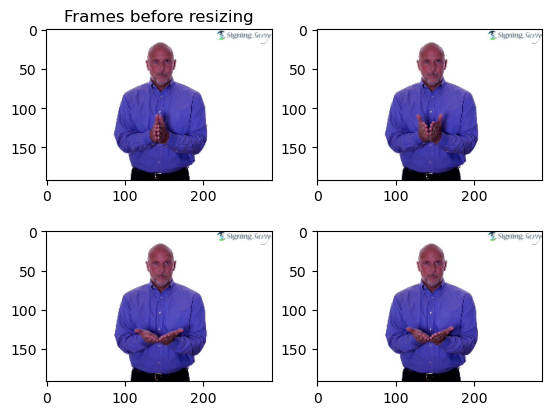

In [340]:
plt.subplot(2,2,1)
plt.title('Frames before resizing')
plt.imshow(cv2.cvtColor(p_video[0],cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(p_video[1],cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(p_video[2],cv2.COLOR_BGR2RGB))
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(p_video[3],cv2.COLOR_BGR2RGB))
plt.show()

In [341]:
p_video = video_preprocessing(frames, True)
n_video = video_normalization(p_video)

38
[ 0 12 24 37]
(4, 120, 160, 3)


Text(0.5, 1.0, 'Frames after resizing')

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

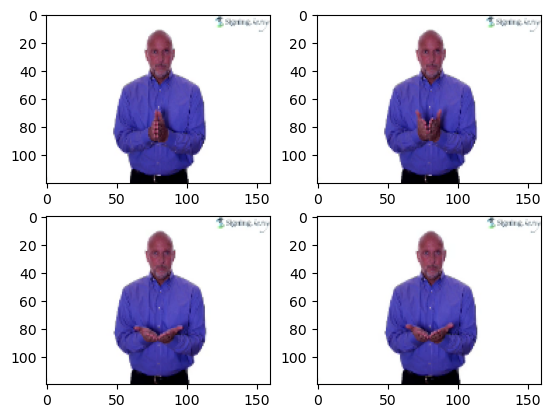

In [342]:
plt.title('Frames after resizing')
plt.subplot(2,2,1)
plt.imshow(n_video[0])
plt.subplot(2,2,2)
plt.imshow(n_video[1])
plt.subplot(2,2,3)
plt.imshow(n_video[2])
plt.subplot(2,2,4)
plt.imshow(n_video[3])
plt.show()

### Animation

In [128]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [135]:
pip install animatplot

  Preparing metadata (setup.py) ... done
  Created wheel for animatplot: filename=animatplot-0.4.2-py3-none-any.whl size=16508 sha256=f9e0eaa25274132f07c9d927f31aabf75bed821ab37bfc57b1cfbd084251d859
  Stored in directory: /home/jupyter/.cache/pip/wheels/60/66/e0/92d7114687fdbf7e4ca93048ebd149911fa293ab59f17410d2
Successfully built animatplot
Note: you may need to restart the kernel to use updated packages.


In [136]:
import numpy as np
import matplotlib.pyplot as plt
import animatplot as amp

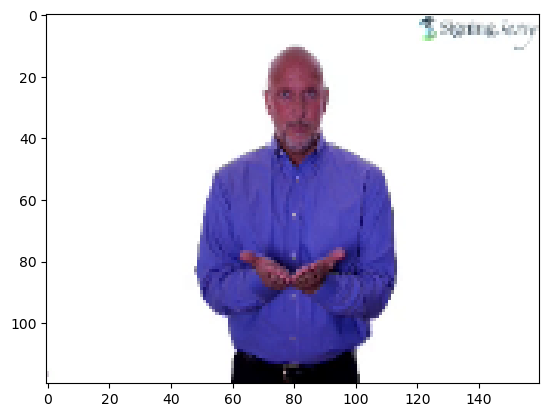

In [159]:
block = amp.blocks.Imshow(p_video)
anim = amp.Animation([block])
anim.save_gif('book')
plt.show()

In [156]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

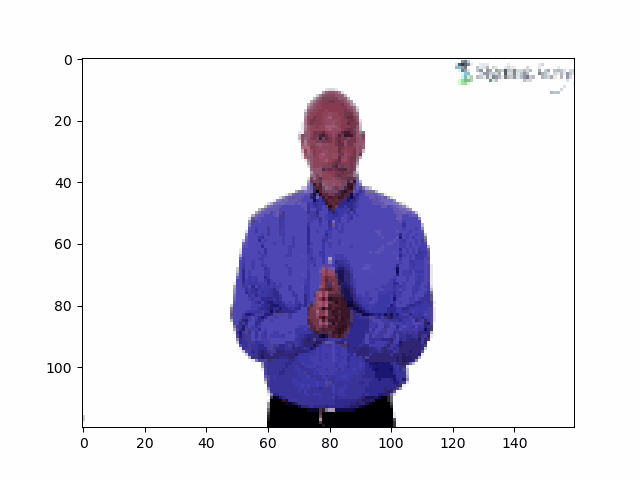

In [160]:
gifPath = "/home/jupyter/sign_language_gesture_recognition/book.gif" # please paste the whole path from Step 2-6
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

In [399]:
def holistic_detection(video):
    holistics = []
    with mp_holistic.Holistic(min_detection_confidence=0.2, min_tracking_confidence=0.2) as holistic:
        number_of_frames = video.shape[0]
        for i in range(number_of_frames):
            frame = video[i]
            _, results = mediapipe_detection(frame, holistic)
            holistics.append(results)
    holistics = np.array(holistics)
    return holistics

In [400]:
narr_holistics = holistic_detection(p_video)

In [401]:
img_with_landmarks = p_video[3].copy()
draw_landmarks(img_with_landmarks, narr_holistics[3])

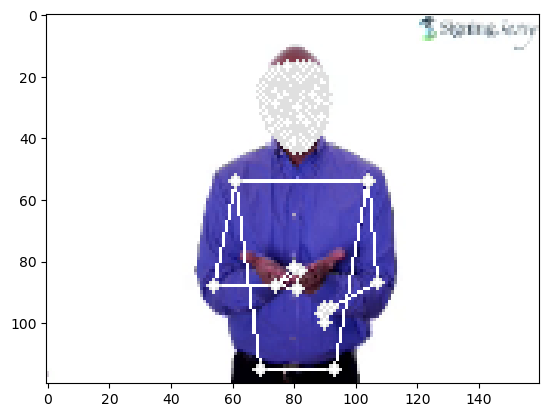

In [402]:
plt.imshow(img_with_landmarks)

In [351]:
n_frames = len(narr_holistics)

In [366]:
pose_arr = np.array([[[pose.x, pose.y, pose.z, pose.visibility] for pose in holistics.pose_landmarks.landmark] for holistics in narr_holistics])
pose_arr = pose_arr.reshape((n_frames, pose_arr.shape[1]*pose_arr.shape[2]))
print(pose_arr.shape)
try:
    l_arm_arr = np.array([[[l_arm.x, l_arm.y, l_arm.z] for l_arm in holistics.left_hand_landmarks.landmark] for holistics in narr_holistics])
    l_arm_arr = l_arm_arr.reshape((n_frames, l_arm_arr.shape[1] * l_arm_arr.shape[2]))
except AttributeError:
    l_arm_arr = np.zeros((n_frames, 21 * 3))
print(l_arm_arr.shape)
try:
    r_arm_arr = np.array([[[r_arm.x, r_arm.y, r_arm.z] for r_arm in holistics.right_hand_landmarks.landmark] for holistics in narr_holistics])
    r_arm_arr = r_arm_arr.reshape((n_frames, r_arm_arr.shape[1] * r_arm_arr.shape[2]))
except AttributeError:
    r_arm_arr = np.zeros((n_frames, 21 * 3))
print(r_arm_arr.shape)


(4, 132)
(4, 63)
(4, 63)


Next we analyze how many keypoints we get from mediapipe. As we can see for each frame we get 132 pose landmarks, 63 landmarks for left hand, as well as for right hand.

In [49]:
for video_id in f_df[f_df['gloss']=='gloves'].video_id.to_list():
    video_id = str(video_id).zfill(5) # Files have 5 digits so if file id is 1000 we must pad to 01000
    video_file_path = os.path.join(videos_path, f'{video_id}.mp4')
    frames,_ = holistic_adnotation(video_file_path)
    break

NameError: name 'holistic_adnotation' is not defined

In [430]:
pp = video_preprocessing(frames, True, 8)

51
[ 1  7 14 21 28 35 42 49]


<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

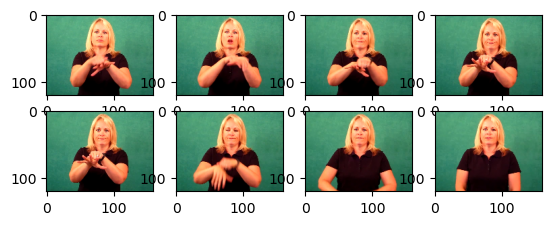

In [431]:
plt.subplot(4,4,1)
plt.imshow(pp[0])
plt.subplot(4,4,2)
plt.imshow(pp[1])
plt.subplot(4,4,3)
plt.imshow(pp[2])
plt.subplot(4,4,4)
plt.imshow(pp[3])
plt.subplot(4,4,5)
plt.imshow(pp[4])
plt.subplot(4,4,6)
plt.imshow(pp[5])
plt.subplot(4,4,7)
plt.imshow(pp[6])
plt.subplot(4,4,8)
plt.imshow(pp[7])

In [436]:
narr_holistics = holistic_detection(pp)
n_frames = len(narr_holistics)

In [434]:
try:
    pose_arr = np.array([[[pose.x, pose.y, pose.z, pose.visibility] for pose in holistics.pose_landmarks.landmark] for holistics in narr_holistics])
    pose_arr = pose_arr.reshape((n_frames, pose_arr.shape[1]*pose_arr.shape[2]))
except AttributeError:
    pose_arr = np.zeros((n_frames, 33*4))
print(pose_arr.shape)
try:
    l_arm_arr = np.array([[[l_arm.x, l_arm.y, l_arm.z] for l_arm in holistics.left_hand_landmarks.landmark] for holistics in narr_holistics])
    l_arm_arr = l_arm_arr.reshape((n_frames, l_arm_arr.shape[1] * l_arm_arr.shape[2]))
except AttributeError:
    l_arm_arr = np.zeros((n_frames, 21 * 3))
print(l_arm_arr.shape)
try:
    r_arm_arr = np.array([[[r_arm.x, r_arm.y, r_arm.z] for r_arm in holistics.right_hand_landmarks.landmark] for holistics in narr_holistics])
    # r_arm_arr = r_arm_arr.reshape((n_frames, r_arm_arr.shape[1] * r_arm_arr.shape[2]))
except AttributeError:
    r_arm_arr = np.zeros((n_frames, 21 * 3))
print(r_arm_arr.shape)


(8, 33, 4)
(8, 63)
(8, 63)


In [435]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [437]:
d = extract_keypoints(narr_holistics[0])

AttributeError: 'numpy.ndarray' object has no attribute 'pose_landmarks'

In [451]:
pd.set_option('display.max_rows', 10)
wlas_df

,gloss,instances
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra..."
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f..."
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
...,...,...
1995,washington,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
1996,waterfall,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
1997,weigh,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
1998,wheelchair,"[{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f..."


In [21]:
pip install scikit-learn

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\GitHub\sign_language_gesture_recognition\sign\Scripts\python.exe -m pip install --upgrade pip' command.


## Top 17 most sampled words

After experimentations we can start building our pipeline. Based on samples distribution we select 17 most sampled words.

In [13]:
most_sampled = ['before', 'thin', 'cool', 'drink', 'go', 'computer', 'who', 'cousin', 'help', 'candy', 'thanksgiving', 'bed', 'bowling', 'tall', 'accident','short', 'trade']

In [14]:
len(most_sampled)

17

In [15]:
np.sum(wlas_df['gloss'].isin(most_sampled))

17

In [18]:
ms_df = f_df[f_df['gloss'].isin(most_sampled)]

In [19]:
len(ms_df)

238

In the dataset there are 238 examples for those 17 words.

In [20]:
ms_df

,gloss,video_id
6,drink,69302
7,drink,65539
8,drink,17710
9,drink,17733
10,drink,65540
...,...,...
1677,trade,59215
1678,trade,59216
1679,trade,59219
1680,trade,59204


In [22]:
from sklearn.utils import shuffle
shuffled_ms_df = shuffle(ms_df) # We should shuffle our dataset

In [23]:
shuffled_ms_df

,gloss,video_id
116,cousin,13641
30,computer,12318
145,help,65890
117,cousin,13642
233,cool,13213
...,...,...
246,cool,13209
524,tall,56852
113,cousin,13636
35,before,5728


We create folders for keypoints as well as preprocessed images.

In [22]:
train_img_path = './img_train'
train_keys_path = './keys_train'
test_img_path = './img_test'
test_keys_path = './keys_test'

In [69]:
for sample in most_sampled:
    try:
        os.makedirs(os.path.join(train_img_path, sample))
    except:
        pass
    try:
        os.makedirs(os.path.join(train_keys_path, sample))
    except:
        pass
    try:
        os.makedirs(os.path.join(test_img_path, sample))
    except:
        pass
    try:
        os.makedirs(os.path.join(test_keys_path, sample))
    except:
        pass

We recreate preprocessing pipeline from experimentation.

In [78]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [79]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [80]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [81]:
def holistic_adnotation_pipeline(video_id, frames_limit=30, output_shape=(120,160)):
    frames = []
    holistics = []
    file_path = f'./dataset/videos/{video_id}.mp4'
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        cap = cv2.VideoCapture(file_path, cv2.CAP_FFMPEG)
        if not cap.isOpened():
            cap = cv2.VideoCapture(-1)
            if not cap.isOpened():
                raise IOError("Cannot open webcam")
            cap = cv2.VideoCapture(file_path, cv2.CAP_FFMPEG)
            if not cap.isOpened():
                raise IOError("Cannot open webcam")
        number_of_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        frames_selected = np.linspace(0,number_of_frames-1, frames_limit, dtype=int)

        for i in range(int(number_of_frames)):
            ret, frame = cap.read()
            if ret:
                if i in frames_selected:
                    image, results = mediapipe_detection(frame, holistic)
                    keys = extract_keypoints(results)
                    holistics.append(keys)
                    res = cv2.resize(image, (output_shape[1], output_shape[0]))
                    res = cv2.cvtColor(res,cv2.COLOR_BGR2RGB)
                    frames.append(res)
        cap.release()
        cv2.destroyAllWindows()
    frames = np.array(frames)
    holistics = np.array(holistics)
    return frames, holistics

And we run our preprocessing. We save all images to the training.

In [82]:
for video_id in ms_df.video_id.to_list():
    gloss = ms_df[ms_df['video_id'] == video_id].gloss.item()
    video_id = str(video_id).zfill(5) # Files have 5 digits so if file id is 1000 we must pad to 01000
    f, h = holistic_adnotation_pipeline(video_id)
    np.save(os.path.join(train_img_path, gloss, video_id), f)
    np.save(os.path.join(train_keys_path, gloss, video_id), h)

In [83]:
x = np.load('./keys_train/accident/00623.npy')

In [90]:
x[10, -130:]

array([-6.21682499e-03,  5.15364885e-01,  2.29658246e-01, -6.72727125e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

We write generator to load our keypoints.

Our x is numpy array of keypoints.
Our y is the index of the word in the vocabulary which was then one-hot encoded using `keras.utils.to_categorical` function

In [24]:
from tensorflow.keras.utils import to_categorical
number_of_words = len(most_sampled)
def data_generator(is_training=True):
    for video_id in ms_df.video_id.to_list():
        gloss = ms_df[ms_df['video_id'] == video_id].gloss.item()
        video_id = str(video_id).zfill(5)
        if is_training:
            path = f'./keys_train/{gloss}/{video_id}.npy'
        else:
            path = f'./keys_test/{gloss}/{video_id}.npy'
        x = np.load(path)
        if x.shape[0] != 30: # hot fix, x shape should be (30,1662)
            x_p = np.zeros((30,1662))
            x_p[:x.shape[0],:] = x
            x = x_p
        y = most_sampled.index(gloss)
        y = to_categorical(y, num_classes=number_of_words, dtype='int32')
        yield x, y

### Hyperparameters

We specify initial hyperparameters for our model

In [85]:
BATCH_SIZE = 238        # Batch size
LEARNING_RATE = 1e-4    # Optimizer learning rate
NUM_EPOCH = 1000        # Number of epochs
VALIDATION_SPLIT = 0.2  # How much data should be split to validation (we only have 238 samples)
MONITOR_ES = 'loss'        # what we want to monitor in EarlyStopping
PATIENCE = NUM_EPOCH/20 # how much patience EarlyStopping should have
MONITOR_MC = 'val_categorical_accuracy' # what we want to monitor in ModelCheckpoint

In [86]:
import tensorflow as tf

ds_series = tf.data.Dataset.from_generator(
    data_generator,
    output_types=(tf.float32, tf.int32),
    output_shapes=((30, 1662), (17,)))
ds = ds_series.shuffle(BATCH_SIZE).batch(BATCH_SIZE)

In [87]:
for batch in ds:
    x, y = batch
    break
input_shape = x.shape

We define callbacks which we will use, that is TensorBoard for visualization. EarlyStopping for model stopping if there is no improvement as well as ModelCheckpoint which will save the best model.

In [88]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

In [89]:
log_dir = './logs'
tensor_board = TensorBoard(log_dir = log_dir)

In [90]:
early_stop = EarlyStopping(monitor=MONITOR_ES, patience=PATIENCE)

In [91]:
modelckpt = ModelCheckpoint(
    monitor = MONITOR_MC,
    save_best_only=True,
    filepath='best_model.h5')

We define model structure

In [78]:
model = models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape[1:]))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(64, return_sequences=False))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(17, activation='softmax'))

In [92]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE,), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [93]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 17)                561       
                                                                 
Total params: 597,137
Trainable params: 597,137
Non-tr

And begin training process.

In [94]:
for batch in ds:
    x, y = batch
    history = model.fit(x=x, y=y, epochs=NUM_EPOCH,callbacks=[tensor_board, early_stop, modelckpt], validation_split=VALIDATION_SPLIT)

Epoch 1/1000
6/6 [==============================] - 9s 476ms/step - loss: 2.8345 - categorical_accuracy: 0.1000 - val_loss: 2.8538 - val_categorical_accuracy: 0.0625
Epoch 2/1000
6/6 [==============================] - 1s 139ms/step - loss: 2.8324 - categorical_accuracy: 0.0684 - val_loss: 2.8555 - val_categorical_accuracy: 0.0833
Epoch 3/1000
6/6 [==============================] - 1s 131ms/step - loss: 2.8194 - categorical_accuracy: 0.0632 - val_loss: 2.8547 - val_categorical_accuracy: 0.0417
Epoch 4/1000
6/6 [==============================] - 1s 135ms/step - loss: 2.8042 - categorical_accuracy: 0.0684 - val_loss: 2.8533 - val_categorical_accuracy: 0.0833
Epoch 5/1000
6/6 [==============================] - 1s 201ms/step - loss: 2.8113 - categorical_accuracy: 0.0737 - val_loss: 2.8592 - val_categorical_accuracy: 0.0417
Epoch 6/1000
6/6 [==============================] - 1s 124ms/step - loss: 2.7987 - categorical_accuracy: 0.1105 - val_loss: 2.8459 - val_categorical_accuracy: 0.0833
Epoc

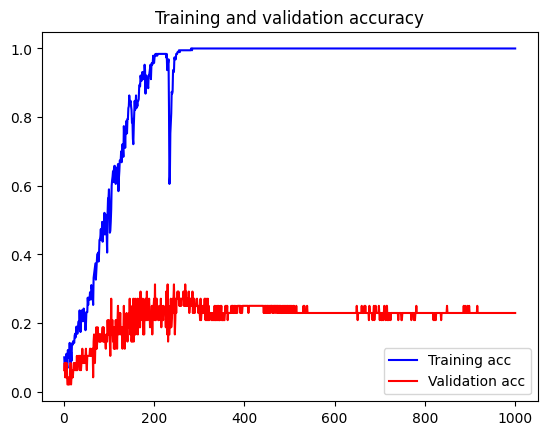

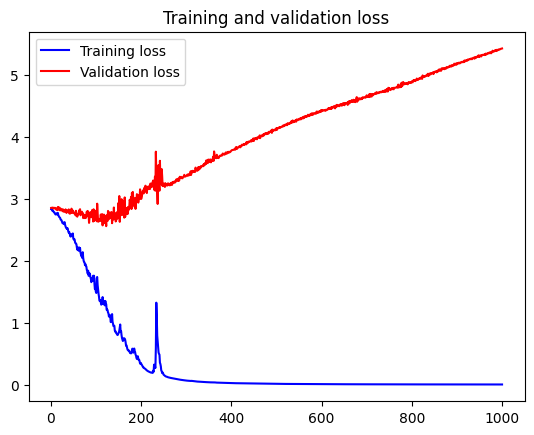

 BATCH_SIZE = 238
 LEARNING_RATE = 0.0001
 NUM_EPOCH = 1000
 VALIDATION_SPLIT = 0.2
 MONITOR_ES = loss
 PATIENCE = 50.0
 MONITOR_MC = val_categorical_accuracy


In [98]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print(f' BATCH_SIZE = {BATCH_SIZE}')
print(f' LEARNING_RATE = {LEARNING_RATE}')
print(f' NUM_EPOCH = {NUM_EPOCH}')
print(f' VALIDATION_SPLIT = {VALIDATION_SPLIT}')
print(f' MONITOR_ES = {MONITOR_ES}')
print(f' PATIENCE = {PATIENCE}')
print(f' MONITOR_MC = {MONITOR_MC}')

In [47]:
%load_ext tensorboard

In [57]:
%tensorboard --logdir logs

Launching TensorBoard...

## Reduce number of nodes

In [99]:
model = models.Sequential()
model.add(layers.LSTM(32, return_sequences=True, activation='relu', input_shape=input_shape[1:]))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(32, return_sequences=False))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(17, activation='softmax'))

In [100]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE,), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [101]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 32)            216960    
                                                                 
 lstm_13 (LSTM)              (None, 30, 64)            24832     
                                                                 
 lstm_14 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 17)                561       
                                                                 
Total params: 258,961
Trainable params: 258,961
Non-tr

In [102]:
for batch in ds:
    x, y = batch
    history = model.fit(x=x, y=y, epochs=NUM_EPOCH,callbacks=[tensor_board, early_stop, modelckpt], validation_split=VALIDATION_SPLIT)

Epoch 1/1000
6/6 [==============================] - 9s 319ms/step - loss: 2.8354 - categorical_accuracy: 0.0526 - val_loss: 2.8446 - val_categorical_accuracy: 0.0833
Epoch 2/1000
6/6 [==============================] - 1s 109ms/step - loss: 2.8296 - categorical_accuracy: 0.0789 - val_loss: 2.8560 - val_categorical_accuracy: 0.0833
Epoch 3/1000
6/6 [==============================] - 1s 95ms/step - loss: 2.8274 - categorical_accuracy: 0.0947 - val_loss: 2.8496 - val_categorical_accuracy: 0.0417
Epoch 4/1000
6/6 [==============================] - 1s 91ms/step - loss: 2.8244 - categorical_accuracy: 0.0789 - val_loss: 2.8499 - val_categorical_accuracy: 0.0417
Epoch 5/1000
6/6 [==============================] - 1s 88ms/step - loss: 2.8204 - categorical_accuracy: 0.0947 - val_loss: 2.8489 - val_categorical_accuracy: 0.0417
Epoch 6/1000
6/6 [==============================] - 1s 98ms/step - loss: 2.8167 - categorical_accuracy: 0.1158 - val_loss: 2.8480 - val_categorical_accuracy: 0.0417
Epoch 7/

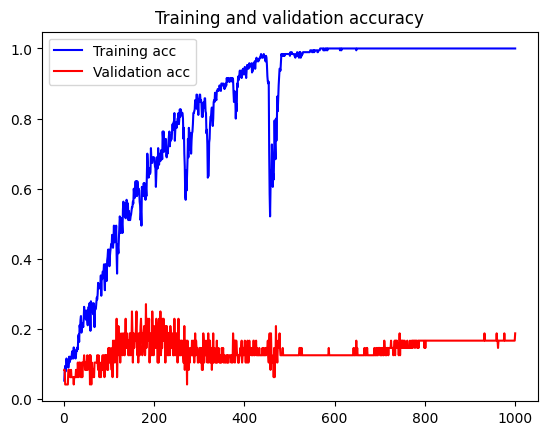

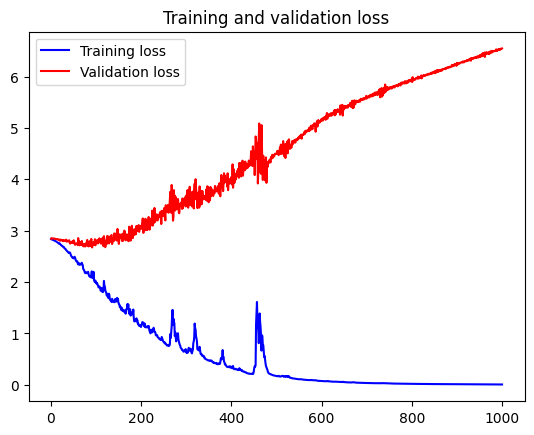

 BATCH_SIZE = 238
 LEARNING_RATE = 0.0001
 NUM_EPOCH = 1000
 VALIDATION_SPLIT = 0.2
 MONITOR_ES = loss
 PATIENCE = 50.0
 MONITOR_MC = val_categorical_accuracy


In [103]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print(f' BATCH_SIZE = {BATCH_SIZE}')
print(f' LEARNING_RATE = {LEARNING_RATE}')
print(f' NUM_EPOCH = {NUM_EPOCH}')
print(f' VALIDATION_SPLIT = {VALIDATION_SPLIT}')
print(f' MONITOR_ES = {MONITOR_ES}')
print(f' PATIENCE = {PATIENCE}')
print(f' MONITOR_MC = {MONITOR_MC}')

## Increasing validation split and changing early stopping monitor to validation loss

In [106]:
VALIDATION_SPLIT = 0.4  # How much data should be split to validation (we only have 238 samples)
MONITOR_ES = 'val_loss'        # what we want to monitor in EarlyStopping

In [107]:
early_stop = EarlyStopping(monitor=MONITOR_ES, patience=PATIENCE)

In [108]:
for batch in ds:
    x, y = batch
    history = model.fit(x=x, y=y, epochs=NUM_EPOCH,callbacks=[tensor_board, early_stop, modelckpt], validation_split=VALIDATION_SPLIT)

Epoch 1/1000
5/5 [==============================] - 13s 574ms/step - loss: 2.2947 - categorical_accuracy: 0.6408 - val_loss: 3.3826 - val_categorical_accuracy: 0.4792
Epoch 2/1000
5/5 [==============================] - 1s 146ms/step - loss: 2.3884 - categorical_accuracy: 0.5352 - val_loss: 1.8971 - val_categorical_accuracy: 0.6458
Epoch 3/1000
5/5 [==============================] - 0s 104ms/step - loss: 2.4070 - categorical_accuracy: 0.5986 - val_loss: 1.9610 - val_categorical_accuracy: 0.5625
Epoch 4/1000
5/5 [==============================] - 0s 109ms/step - loss: 2.0943 - categorical_accuracy: 0.6197 - val_loss: 1.7873 - val_categorical_accuracy: 0.6042
Epoch 5/1000
5/5 [==============================] - 0s 101ms/step - loss: 1.4966 - categorical_accuracy: 0.7535 - val_loss: 1.9194 - val_categorical_accuracy: 0.5208
Epoch 6/1000
5/5 [==============================] - 0s 106ms/step - loss: 1.9604 - categorical_accuracy: 0.6479 - val_loss: 1.6745 - val_categorical_accuracy: 0.6354
Epo

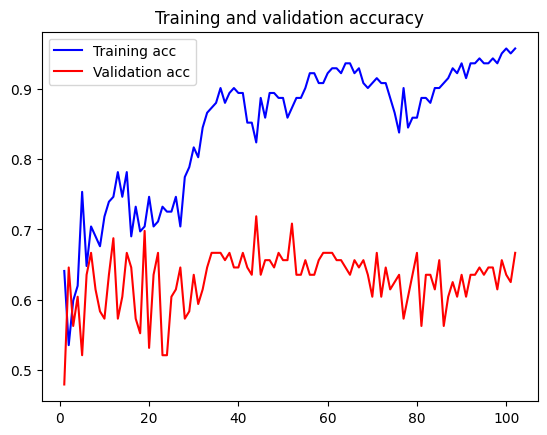

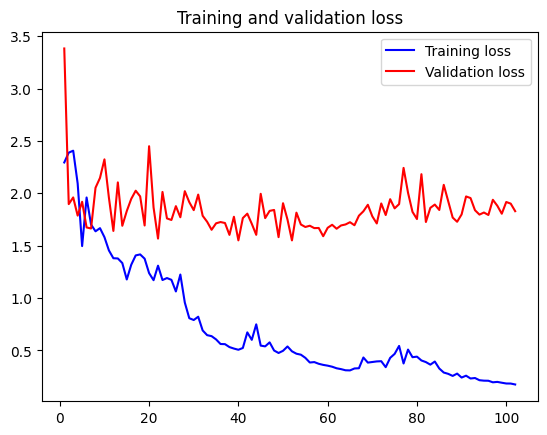

 BATCH_SIZE = 238
 LEARNING_RATE = 0.0001
 NUM_EPOCH = 1000
 VALIDATION_SPLIT = 0.4
 MONITOR_ES = val_loss
 PATIENCE = 50.0
 MONITOR_MC = val_categorical_accuracy


In [109]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print(f' BATCH_SIZE = {BATCH_SIZE}')
print(f' LEARNING_RATE = {LEARNING_RATE}')
print(f' NUM_EPOCH = {NUM_EPOCH}')
print(f' VALIDATION_SPLIT = {VALIDATION_SPLIT}')
print(f' MONITOR_ES = {MONITOR_ES}')
print(f' PATIENCE = {PATIENCE}')
print(f' MONITOR_MC = {MONITOR_MC}')

Learning stopped after 100 epochs. Increasing validation split increased val_categorical_accuracy.

## Adjust learning rate

In [111]:
LEARNING_RATE = 1e-5

In [112]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE,), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [113]:
for batch in ds:
    x, y = batch
    history = model.fit(x=x, y=y, epochs=NUM_EPOCH,callbacks=[tensor_board, early_stop, modelckpt], validation_split=VALIDATION_SPLIT)

Epoch 1/1000
5/5 [==============================] - 14s 577ms/step - loss: 0.8600 - categorical_accuracy: 0.8451 - val_loss: 0.7903 - val_categorical_accuracy: 0.8333
Epoch 2/1000
5/5 [==============================] - 0s 106ms/step - loss: 0.7904 - categorical_accuracy: 0.8521 - val_loss: 0.8290 - val_categorical_accuracy: 0.8333
Epoch 3/1000
5/5 [==============================] - 1s 104ms/step - loss: 0.7529 - categorical_accuracy: 0.8521 - val_loss: 0.8710 - val_categorical_accuracy: 0.8125
Epoch 4/1000
5/5 [==============================] - 1s 107ms/step - loss: 0.7237 - categorical_accuracy: 0.8521 - val_loss: 0.8443 - val_categorical_accuracy: 0.8125
Epoch 5/1000
5/5 [==============================] - 1s 107ms/step - loss: 0.6863 - categorical_accuracy: 0.8592 - val_loss: 0.8177 - val_categorical_accuracy: 0.8021
Epoch 6/1000
5/5 [==============================] - 0s 89ms/step - loss: 0.6679 - categorical_accuracy: 0.8662 - val_loss: 0.8152 - val_categorical_accuracy: 0.8229
Epoc

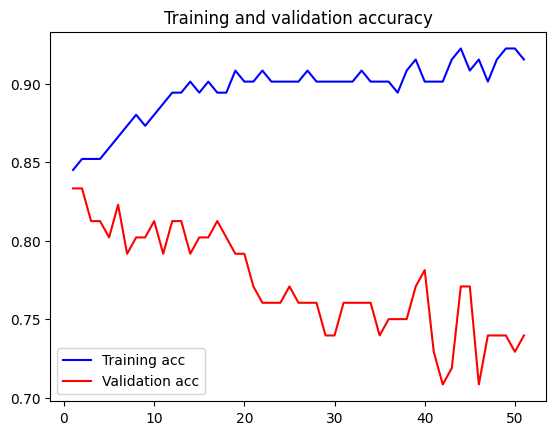

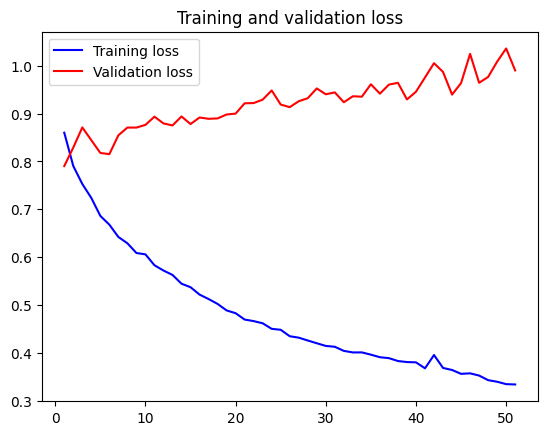

 BATCH_SIZE = 238
 LEARNING_RATE = 1e-05
 NUM_EPOCH = 1000
 VALIDATION_SPLIT = 0.4
 MONITOR_ES = val_loss
 PATIENCE = 50.0
 MONITOR_MC = val_categorical_accuracy


In [114]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print(f' BATCH_SIZE = {BATCH_SIZE}')
print(f' LEARNING_RATE = {LEARNING_RATE}')
print(f' NUM_EPOCH = {NUM_EPOCH}')
print(f' VALIDATION_SPLIT = {VALIDATION_SPLIT}')
print(f' MONITOR_ES = {MONITOR_ES}')
print(f' PATIENCE = {PATIENCE}')
print(f' MONITOR_MC = {MONITOR_MC}')

## Load best mode, decrease learning rate, increase patience

In [115]:
from tensorflow import keras
model = keras.models.load_model('./best_model.h5')

In [121]:
LEARNING_RATE = 1e-6
PATIENCE = 200

In [122]:
early_stop = EarlyStopping(monitor=MONITOR_ES, patience=PATIENCE)

In [123]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE,), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [124]:
for batch in ds:
    x, y = batch
    history = model.fit(x=x, y=y, epochs=NUM_EPOCH,callbacks=[tensor_board, early_stop, modelckpt], validation_split=VALIDATION_SPLIT)

Epoch 1/1000
5/5 [==============================] - 8s 335ms/step - loss: 0.5510 - categorical_accuracy: 0.8521 - val_loss: 0.9309 - val_categorical_accuracy: 0.8438
Epoch 2/1000
5/5 [==============================] - 0s 99ms/step - loss: 0.5341 - categorical_accuracy: 0.8732 - val_loss: 0.9292 - val_categorical_accuracy: 0.8438
Epoch 3/1000
5/5 [==============================] - 0s 83ms/step - loss: 0.5234 - categorical_accuracy: 0.8732 - val_loss: 0.9302 - val_categorical_accuracy: 0.8333
Epoch 4/1000
5/5 [==============================] - 0s 83ms/step - loss: 0.5132 - categorical_accuracy: 0.8803 - val_loss: 0.9327 - val_categorical_accuracy: 0.8333
Epoch 5/1000
5/5 [==============================] - 0s 82ms/step - loss: 0.5049 - categorical_accuracy: 0.8803 - val_loss: 0.9358 - val_categorical_accuracy: 0.8333
Epoch 6/1000
5/5 [==============================] - 1s 161ms/step - loss: 0.4982 - categorical_accuracy: 0.8873 - val_loss: 0.9377 - val_categorical_accuracy: 0.8333
Epoch 7/

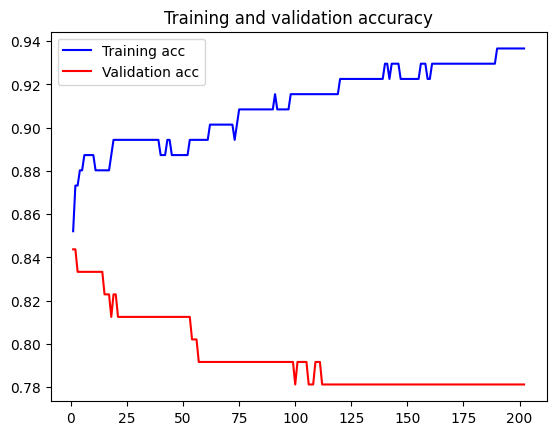

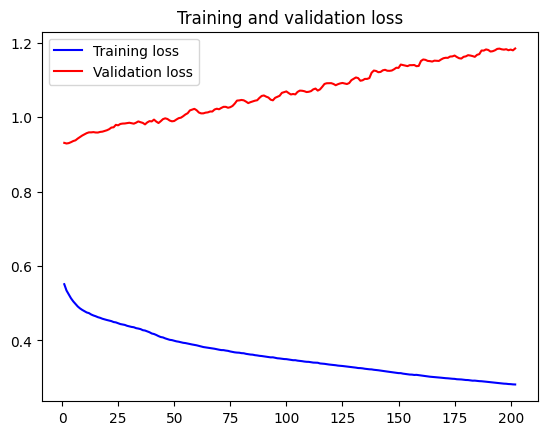

 BATCH_SIZE = 238
 LEARNING_RATE = 1e-06
 NUM_EPOCH = 1000
 VALIDATION_SPLIT = 0.4
 MONITOR_ES = val_loss
 PATIENCE = 200
 MONITOR_MC = val_categorical_accuracy


In [125]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print(f' BATCH_SIZE = {BATCH_SIZE}')
print(f' LEARNING_RATE = {LEARNING_RATE}')
print(f' NUM_EPOCH = {NUM_EPOCH}')
print(f' VALIDATION_SPLIT = {VALIDATION_SPLIT}')
print(f' MONITOR_ES = {MONITOR_ES}')
print(f' PATIENCE = {PATIENCE}')
print(f' MONITOR_MC = {MONITOR_MC}')

We have reached the maximum with this model. Let's add some regularization

In [126]:
BATCH_SIZE = 238
LEARNING_RATE = 1e-4
NUM_EPOCH = 1000
VALIDATION_SPLIT = 0.4
MONITOR_ES = 'val_loss'
PATIENCE = NUM_EPOCH/5
MONITOR_MC = 'val_categorical_accuracy'

In [127]:
model = models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape[1:]))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(64, return_sequences=False))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.LayerNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(17, activation='softmax'))

In [128]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_16 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 layer_normalization (LayerN  (None, 64)               128       
 ormalization)                                                   
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                      

In [129]:
early_stop = EarlyStopping(monitor=MONITOR_ES, patience=PATIENCE)

In [131]:
modelckpt = ModelCheckpoint(
    monitor = MONITOR_MC,
    save_best_only=True,
    filepath='best_reg_model.h5')

In [132]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE,), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [133]:
for batch in ds:
    x, y = batch
    history = model.fit(x=x, y=y, epochs=NUM_EPOCH,callbacks=[tensor_board, early_stop, modelckpt], validation_split=VALIDATION_SPLIT)

Epoch 1/1000
5/5 [==============================] - 9s 448ms/step - loss: 3.0041 - categorical_accuracy: 0.0845 - val_loss: 2.9273 - val_categorical_accuracy: 0.0625
Epoch 2/1000
5/5 [==============================] - 1s 155ms/step - loss: 2.9179 - categorical_accuracy: 0.0563 - val_loss: 2.9057 - val_categorical_accuracy: 0.0833
Epoch 3/1000
5/5 [==============================] - 1s 130ms/step - loss: 2.8749 - categorical_accuracy: 0.0704 - val_loss: 2.8740 - val_categorical_accuracy: 0.0833
Epoch 4/1000
5/5 [==============================] - 1s 149ms/step - loss: 2.8678 - categorical_accuracy: 0.0775 - val_loss: 2.8464 - val_categorical_accuracy: 0.0521
Epoch 5/1000
5/5 [==============================] - 1s 145ms/step - loss: 2.8006 - categorical_accuracy: 0.0634 - val_loss: 2.7904 - val_categorical_accuracy: 0.0729
Epoch 6/1000
5/5 [==============================] - 1s 172ms/step - loss: 2.7989 - categorical_accuracy: 0.0775 - val_loss: 2.8225 - val_categorical_accuracy: 0.1042
Epoc

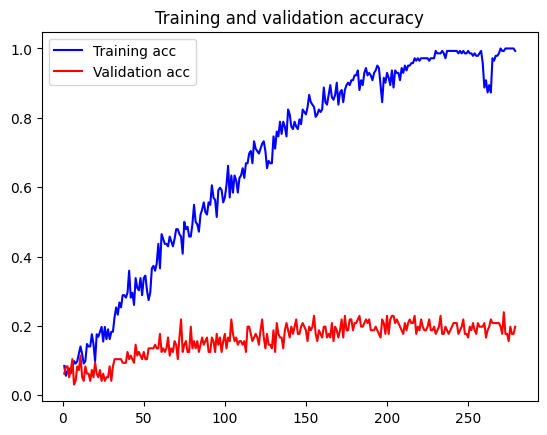

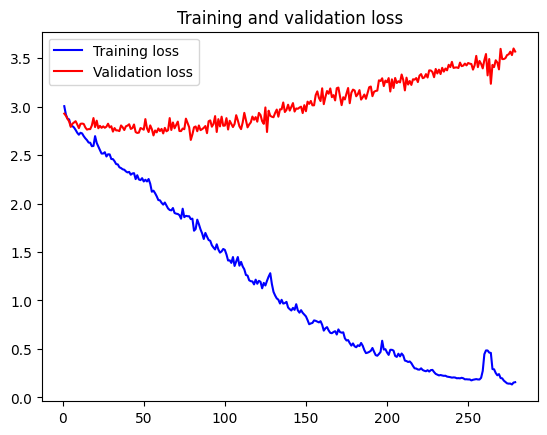

 BATCH_SIZE = 238
 LEARNING_RATE = 0.0001
 NUM_EPOCH = 1000
 VALIDATION_SPLIT = 0.4
 MONITOR_ES = val_loss
 PATIENCE = 200.0
 MONITOR_MC = val_categorical_accuracy


In [134]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print(f' BATCH_SIZE = {BATCH_SIZE}')
print(f' LEARNING_RATE = {LEARNING_RATE}')
print(f' NUM_EPOCH = {NUM_EPOCH}')
print(f' VALIDATION_SPLIT = {VALIDATION_SPLIT}')
print(f' MONITOR_ES = {MONITOR_ES}')
print(f' PATIENCE = {PATIENCE}')
print(f' MONITOR_MC = {MONITOR_MC}')

In [135]:
model = models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape[1:]))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(64, return_sequences=False))
model.add(layers.LayerNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(17, activation='softmax'))

In [136]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_19 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_20 (LSTM)              (None, 64)                49408     
                                                                 
 layer_normalization_1 (Laye  (None, 64)               128       
 rNormalization)                                                 
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                        

In [137]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE,), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [138]:
for batch in ds:
    x, y = batch
    history = model.fit(x=x, y=y, epochs=NUM_EPOCH,callbacks=[tensor_board, early_stop, modelckpt], validation_split=VALIDATION_SPLIT)

Epoch 1/1000
5/5 [==============================] - 8s 391ms/step - loss: 3.1934 - categorical_accuracy: 0.0845 - val_loss: 2.9046 - val_categorical_accuracy: 0.0417
Epoch 2/1000
5/5 [==============================] - 2s 449ms/step - loss: 2.9710 - categorical_accuracy: 0.0775 - val_loss: 2.8892 - val_categorical_accuracy: 0.0625
Epoch 3/1000
5/5 [==============================] - 1s 109ms/step - loss: 2.8417 - categorical_accuracy: 0.1268 - val_loss: 2.8911 - val_categorical_accuracy: 0.0625
Epoch 4/1000
5/5 [==============================] - 1s 115ms/step - loss: 2.6703 - categorical_accuracy: 0.1761 - val_loss: 2.8835 - val_categorical_accuracy: 0.0625
Epoch 5/1000
5/5 [==============================] - 1s 113ms/step - loss: 2.6490 - categorical_accuracy: 0.1972 - val_loss: 2.8650 - val_categorical_accuracy: 0.0625
Epoch 6/1000
5/5 [==============================] - 1s 111ms/step - loss: 2.5597 - categorical_accuracy: 0.2254 - val_loss: 2.8536 - val_categorical_accuracy: 0.0625
Epoc

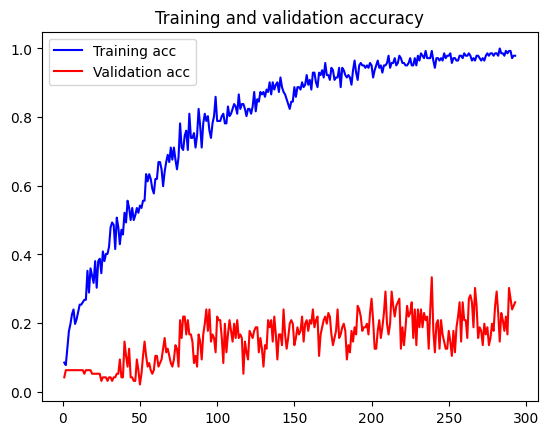

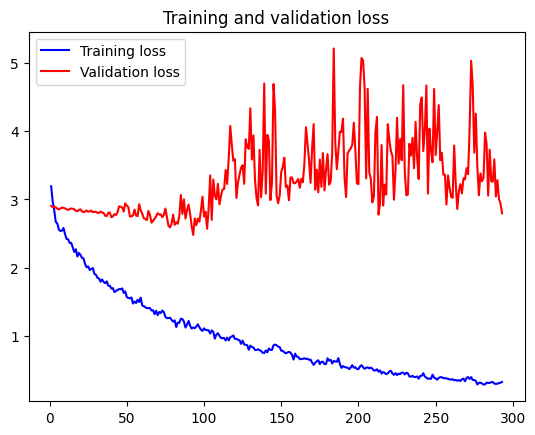

 BATCH_SIZE = 238
 LEARNING_RATE = 0.0001
 NUM_EPOCH = 1000
 VALIDATION_SPLIT = 0.4
 MONITOR_ES = val_loss
 PATIENCE = 200.0
 MONITOR_MC = val_categorical_accuracy


In [139]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print(f' BATCH_SIZE = {BATCH_SIZE}')
print(f' LEARNING_RATE = {LEARNING_RATE}')
print(f' NUM_EPOCH = {NUM_EPOCH}')
print(f' VALIDATION_SPLIT = {VALIDATION_SPLIT}')
print(f' MONITOR_ES = {MONITOR_ES}')
print(f' PATIENCE = {PATIENCE}')
print(f' MONITOR_MC = {MONITOR_MC}')

## Remove Layer Normalization

In [140]:
model = models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape[1:]))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(64, return_sequences=False))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(17, activation='softmax'))

In [142]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE,), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [143]:
for batch in ds:
    x, y = batch
    history = model.fit(x=x, y=y, epochs=NUM_EPOCH,callbacks=[tensor_board, early_stop, modelckpt], validation_split=VALIDATION_SPLIT)

Epoch 1/1000
5/5 [==============================] - 13s 550ms/step - loss: 3.2531 - categorical_accuracy: 0.0352 - val_loss: 2.8282 - val_categorical_accuracy: 0.0729
Epoch 2/1000
5/5 [==============================] - 1s 178ms/step - loss: 2.9847 - categorical_accuracy: 0.1056 - val_loss: 2.8266 - val_categorical_accuracy: 0.0521
Epoch 3/1000
5/5 [==============================] - 1s 162ms/step - loss: 2.8224 - categorical_accuracy: 0.0986 - val_loss: 2.8283 - val_categorical_accuracy: 0.0521
Epoch 4/1000
5/5 [==============================] - 1s 163ms/step - loss: 2.7048 - categorical_accuracy: 0.1549 - val_loss: 2.8297 - val_categorical_accuracy: 0.0625
Epoch 5/1000
5/5 [==============================] - 1s 169ms/step - loss: 2.6421 - categorical_accuracy: 0.1338 - val_loss: 2.8303 - val_categorical_accuracy: 0.0312
Epoch 6/1000
5/5 [==============================] - 1s 162ms/step - loss: 2.5101 - categorical_accuracy: 0.1761 - val_loss: 2.8302 - val_categorical_accuracy: 0.0312
Epo

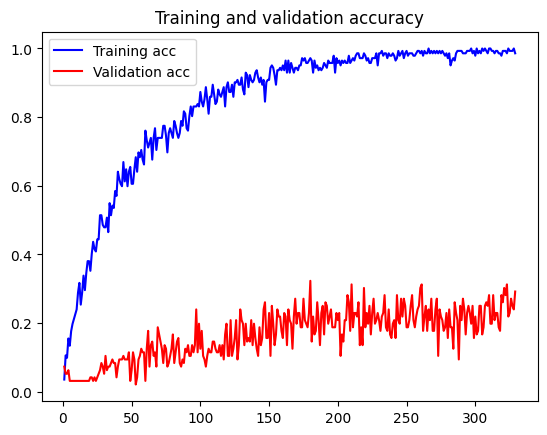

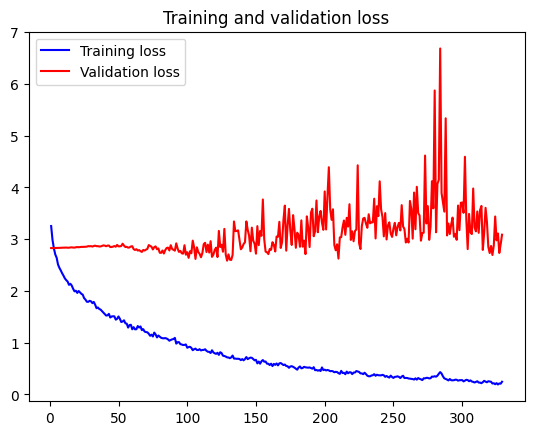

 BATCH_SIZE = 238
 LEARNING_RATE = 0.0001
 NUM_EPOCH = 1000
 VALIDATION_SPLIT = 0.4
 MONITOR_ES = val_loss
 PATIENCE = 200.0
 MONITOR_MC = val_categorical_accuracy


In [144]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print(f' BATCH_SIZE = {BATCH_SIZE}')
print(f' LEARNING_RATE = {LEARNING_RATE}')
print(f' NUM_EPOCH = {NUM_EPOCH}')
print(f' VALIDATION_SPLIT = {VALIDATION_SPLIT}')
print(f' MONITOR_ES = {MONITOR_ES}')
print(f' PATIENCE = {PATIENCE}')
print(f' MONITOR_MC = {MONITOR_MC}')

A lot of fluctuation in validation. Decrease learning rate

In [145]:
LEARNING_RATE = 1e-5

In [146]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE,), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [147]:
for batch in ds:
    x, y = batch
    history = model.fit(x=x, y=y, epochs=NUM_EPOCH,callbacks=[tensor_board, early_stop, modelckpt], validation_split=VALIDATION_SPLIT)

Epoch 1/1000
5/5 [==============================] - 13s 621ms/step - loss: 1.2723 - categorical_accuracy: 0.7183 - val_loss: 1.9204 - val_categorical_accuracy: 0.5521
Epoch 2/1000
5/5 [==============================] - 1s 146ms/step - loss: 1.2203 - categorical_accuracy: 0.7042 - val_loss: 3.2739 - val_categorical_accuracy: 0.2917
Epoch 3/1000
5/5 [==============================] - 1s 152ms/step - loss: 1.1583 - categorical_accuracy: 0.6831 - val_loss: 4.0047 - val_categorical_accuracy: 0.1875
Epoch 4/1000
5/5 [==============================] - 1s 166ms/step - loss: 1.1243 - categorical_accuracy: 0.7183 - val_loss: 4.2715 - val_categorical_accuracy: 0.1771
Epoch 5/1000
5/5 [==============================] - 1s 155ms/step - loss: 1.0970 - categorical_accuracy: 0.7183 - val_loss: 3.9897 - val_categorical_accuracy: 0.1771
Epoch 6/1000
5/5 [==============================] - 1s 162ms/step - loss: 1.0453 - categorical_accuracy: 0.7113 - val_loss: 3.8301 - val_categorical_accuracy: 0.1875
Epo

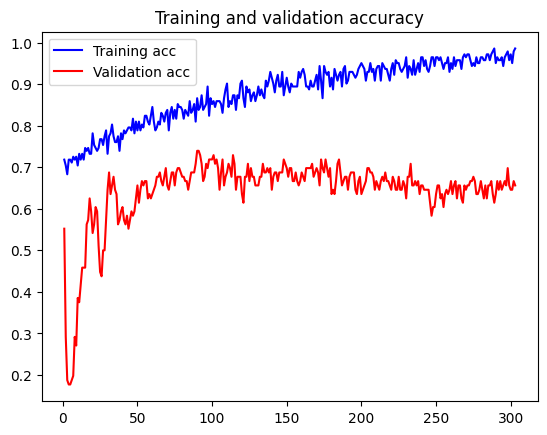

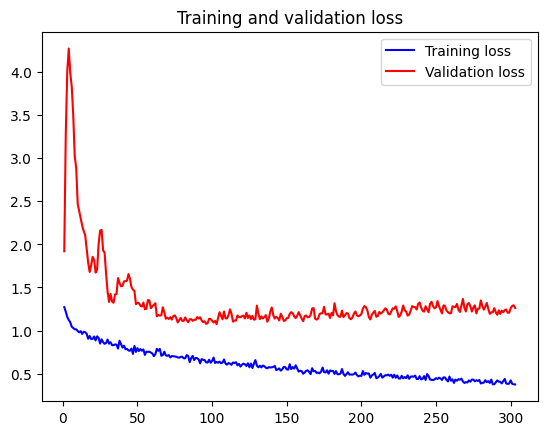

 BATCH_SIZE = 238
 LEARNING_RATE = 1e-05
 NUM_EPOCH = 1000
 VALIDATION_SPLIT = 0.4
 MONITOR_ES = val_loss
 PATIENCE = 200.0
 MONITOR_MC = val_categorical_accuracy


In [148]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print(f' BATCH_SIZE = {BATCH_SIZE}')
print(f' LEARNING_RATE = {LEARNING_RATE}')
print(f' NUM_EPOCH = {NUM_EPOCH}')
print(f' VALIDATION_SPLIT = {VALIDATION_SPLIT}')
print(f' MONITOR_ES = {MONITOR_ES}')
print(f' PATIENCE = {PATIENCE}')
print(f' MONITOR_MC = {MONITOR_MC}')

Good accuracy and loss plots. After initial struggle model starts to learn.

## Add L1 and L2 regularization

In [153]:
L1_RATE = 1e-5
L2_RATE = 1e-4

In [ ]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape[1:]))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(64, return_sequences=False))
model.add(layers.Dense(
    64,
    activation='relu',
    kernel_regularizer=regularizers.L1L2(l1=L1_RATE, l2=L2_RATE),
    bias_regularizer=regularizers.L2(L2_RATE),
    activity_regularizer=regularizers.L2(L1_RATE)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(
    32,
    activation='relu',
    kernel_regularizer=regularizers.L1L2(l1=L1_RATE, l2=L2_RATE),
    bias_regularizer=regularizers.L2(L2_RATE),
    activity_regularizer=regularizers.L2(L1_RATE)))

model.add(layers.BatchNormalization())
model.add(layers.Dense(17, activation='softmax'))

In [163]:
LEARNING_RATE = 1e-5

In [155]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE,), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [156]:
for batch in ds:
    x, y = batch
    history = model.fit(x=x, y=y, epochs=NUM_EPOCH,callbacks=[tensor_board, early_stop, modelckpt], validation_split=VALIDATION_SPLIT)

Epoch 1/1000
5/5 [==============================] - 15s 638ms/step - loss: 0.7008 - categorical_accuracy: 0.8521 - val_loss: 0.8047 - val_categorical_accuracy: 0.7708
Epoch 2/1000
5/5 [==============================] - 1s 177ms/step - loss: 0.6887 - categorical_accuracy: 0.8803 - val_loss: 0.6183 - val_categorical_accuracy: 0.8229
Epoch 3/1000
5/5 [==============================] - 1s 189ms/step - loss: 0.6714 - categorical_accuracy: 0.8592 - val_loss: 0.6077 - val_categorical_accuracy: 0.8958
Epoch 4/1000
5/5 [==============================] - 1s 264ms/step - loss: 0.6389 - categorical_accuracy: 0.8451 - val_loss: 0.5908 - val_categorical_accuracy: 0.8750
Epoch 5/1000
5/5 [==============================] - 1s 159ms/step - loss: 0.6174 - categorical_accuracy: 0.8662 - val_loss: 0.5996 - val_categorical_accuracy: 0.8333
Epoch 6/1000
5/5 [==============================] - 1s 185ms/step - loss: 0.5979 - categorical_accuracy: 0.8732 - val_loss: 0.6183 - val_categorical_accuracy: 0.8333
Epo

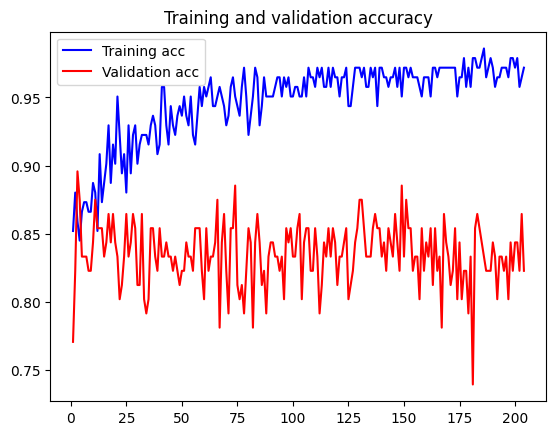

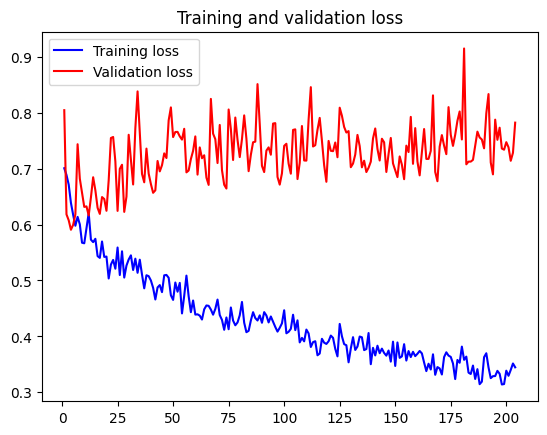

 BATCH_SIZE = 238
 LEARNING_RATE = 1e-05
 NUM_EPOCH = 1000
 VALIDATION_SPLIT = 0.4
 MONITOR_ES = val_loss
 PATIENCE = 200.0
 MONITOR_MC = val_categorical_accuracy
L1_RATE = 1e-05
L2_RATE = 0.0001


In [164]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print(f' BATCH_SIZE = {BATCH_SIZE}')
print(f' LEARNING_RATE = {LEARNING_RATE}')
print(f' NUM_EPOCH = {NUM_EPOCH}')
print(f' VALIDATION_SPLIT = {VALIDATION_SPLIT}')
print(f' MONITOR_ES = {MONITOR_ES}')
print(f' PATIENCE = {PATIENCE}')
print(f' MONITOR_MC = {MONITOR_MC}')
print(f'L1_RATE = {L1_RATE}')
print(f'L2_RATE = {L2_RATE}')

In [165]:
from tensorflow import keras
model = keras.models.load_model('./best_reg_model.h5')

In [166]:
LEARNING_RATE = 5e-7

In [167]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE,), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [168]:
modelckpt = ModelCheckpoint(
    monitor = MONITOR_MC,
    save_best_only=True,
    filepath='best_reg_model_2.h5')

In [169]:
for batch in ds:
    x, y = batch
    history = model.fit(x=x, y=y, epochs=NUM_EPOCH,callbacks=[tensor_board, early_stop, modelckpt], validation_split=VALIDATION_SPLIT)

Epoch 1/1000
5/5 [==============================] - 15s 558ms/step - loss: 0.6158 - categorical_accuracy: 0.8732 - val_loss: 0.6409 - val_categorical_accuracy: 0.8750
Epoch 2/1000
5/5 [==============================] - 1s 223ms/step - loss: 0.5889 - categorical_accuracy: 0.8732 - val_loss: 0.6230 - val_categorical_accuracy: 0.8646
Epoch 3/1000
5/5 [==============================] - 1s 136ms/step - loss: 0.5903 - categorical_accuracy: 0.9014 - val_loss: 0.6092 - val_categorical_accuracy: 0.8646
Epoch 4/1000
5/5 [==============================] - 1s 148ms/step - loss: 0.5936 - categorical_accuracy: 0.8592 - val_loss: 0.6008 - val_categorical_accuracy: 0.8750
Epoch 5/1000
5/5 [==============================] - 1s 169ms/step - loss: 0.5970 - categorical_accuracy: 0.8451 - val_loss: 0.5971 - val_categorical_accuracy: 0.8750
Epoch 6/1000
5/5 [==============================] - 1s 165ms/step - loss: 0.5933 - categorical_accuracy: 0.9085 - val_loss: 0.5963 - val_categorical_accuracy: 0.8750
Epo

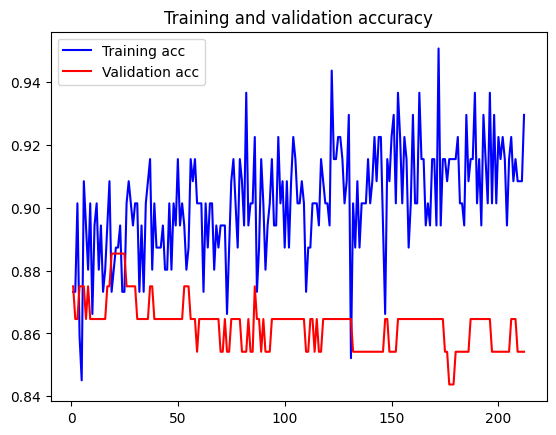

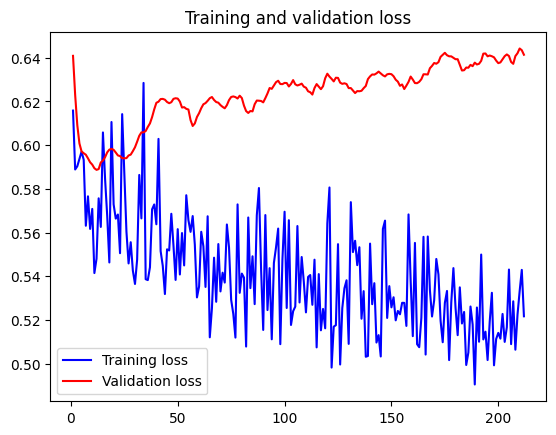

 BATCH_SIZE = 238
 LEARNING_RATE = 5e-07
 NUM_EPOCH = 1000
 VALIDATION_SPLIT = 0.4
 MONITOR_ES = val_loss
 PATIENCE = 200.0
 MONITOR_MC = val_categorical_accuracy
L1_RATE = 1e-05
L2_RATE = 0.0001


In [170]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print(f' BATCH_SIZE = {BATCH_SIZE}')
print(f' LEARNING_RATE = {LEARNING_RATE}')
print(f' NUM_EPOCH = {NUM_EPOCH}')
print(f' VALIDATION_SPLIT = {VALIDATION_SPLIT}')
print(f' MONITOR_ES = {MONITOR_ES}')
print(f' PATIENCE = {PATIENCE}')
print(f' MONITOR_MC = {MONITOR_MC}')
print(f'L1_RATE = {L1_RATE}')
print(f'L2_RATE = {L2_RATE}')

It seems we reached a maximum of what we can achieve with our proposed model.

## Testing models

There is not enough data in dataset to run meaningful testing analysis. Because of that plotting things like confusion matrix won't give us any useful information.
There is possibility to create additional dataset in which authors are trying to recreate signs from ASL on video and feed them to the preprocessing model.

There are other datasets which authors of the paper acknowledge. Problem is none of them are in American Sign Language standard. For example Polish Sign Language is not compatible with American Sign Language. Even though they may share the same origin there are a lot of difference. Testing model on other sign language could be compared to training model to distinguish Korean words and they testing it on Chinese language. Even though many words in Korean originate from Chinese, as this language was used in the past, we can clearly see how much different those two languages are now.

![Other datasets](./other_datasets.png)
Source Li, Dongxu, Cristian Rodriguez Opazo, Xin Yu, and Hongdong Li. “Word-Level Deep Sign Language Recognition from Video: A New Large-Scale Dataset and Methods Comparison,” October 24, 2019. [https://doi.org/10.48550/arXiv.1910.11006](https://doi.org/10.48550/arXiv.1910.11006).


In [172]:
# TODO: generate videos

# Previous approaches (FAILED)

Here are previous attempts. Even though they did not succeed (most likely due to not enough samples per word and too many classes), they were useful to construct final model.

## Limiting 2000 words to 95

In [42]:
set_of_words = set(
    ['book','drink','go','clothes','deaf','help','walk','no','yes','mother','woman','bed','dog','family','man','doctor','medicine','right','study','work','birthday','son','read','learn','cat','brother','wife','daugter','good','children','girl','husband','student','please','father','sister','sorry','talk','thank you','blind','car','morning','night','sit','asl','kitchen','bathroom','home','house','restaurant','noon','afternoon','night','bedroom','zero','one','two','three','four','five','six','seven','eight','nine','monday','tuesday','wednesday','thursday','friday','saturday','sunday','me','we','spring','summer','autumn','winter','this','a','b','c','d','e','f','g','h','i','j','k','l','m','o','p','r','s','t','u','v','w'])

In [43]:
len(set_of_words)

98

In [44]:
np.sum(wlas_df['gloss'].isin(set_of_words))

95

It's hard to manually check all proposed words. From summary we can see isin found 95 out of 98 proposed words.

In [50]:
np.sum(f_df['gloss'].isin(set_of_words))

675

In total it gives us 675 videos to train our model

In [51]:
selected_df = f_df[f_df['gloss'].isin(set_of_words)]

In [461]:
selected_df

,gloss,video_id
0,book,69241
1,book,7069
2,book,7068
3,book,7070
4,book,7099
...,...,...
11909,v,61565
11956,w,66061
11957,w,63274
11958,w,63276


In [469]:
words = selected_df['gloss'].unique().tolist()

In [468]:
dst_path = './selected_dataset'

In [471]:
keys_path = './keys_dataset'

In [472]:
for word in words: 
    try: 
        os.makedirs(os.path.join(keys_path, word))
    except:
        pass
    try: 
        os.makedirs(os.path.join(dst_path, word))
    except:
        pass

In [480]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [481]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [482]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [483]:
def holistic_adnotation_pipeline(video_id, frames_limit=10, output_shape=(120,160)):
    frames = []
    holistics = []
    file_path = f'./dataset/videos/{video_id}.mp4'
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        cap = cv2.VideoCapture(file_path, cv2.CAP_FFMPEG)
        if not cap.isOpened():
            cap = cv2.VideoCapture(-1)
            if not cap.isOpened():
                raise IOError("Cannot open webcam")
            cap = cv2.VideoCapture(file_path, cv2.CAP_FFMPEG)
            if not cap.isOpened():
                raise IOError("Cannot open webcam")
        number_of_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        frames_selected = np.linspace(0,number_of_frames-1, frames_limit, dtype=int)
        
        for i in range(int(number_of_frames)):
            ret, frame = cap.read()
            if ret:
                if i in frames_selected:
                    image, results = mediapipe_detection(frame, holistic)
                    keys = extract_keypoints(results)
                    holistics.append(keys)
                    res = cv2.resize(image, (output_shape[1], output_shape[0]))
                    res = cv2.cvtColor(res,cv2.COLOR_BGR2RGB) 
                    frames.append(res)
        cap.release()
        cv2.destroyAllWindows()
    frames = np.array(frames)
    holistics = np.array(holistics)
    return frames, holistics

In [497]:
for video_id in selected_df.video_id.to_list():
    gloss = selected_df[selected_df['video_id'] == video_id].gloss.item()
    video_id = str(video_id).zfill(5) # Files have 5 digits so if file id is 1000 we must pad to 01000    
    f, h = holistic_adnotation_pipeline(video_id)
    np.save(os.path.join(dst_path, gloss, video_id), f)
    np.save(os.path.join(keys_path, gloss, video_id), h)

### Problem with mediapipe holistic hands detections

In [505]:
x = np.load('/home/jupyter/sign_language_gesture_recognition/keys_dataset/a/01610.npy')

In [506]:
x.shape

(10, 1662)

In [528]:
print(words)

['book', 'drink', 'go', 'clothes', 'deaf', 'help', 'no', 'walk', 'yes', 'mother', 'woman', 'bed', 'dog', 'family', 'man', 'study', 'doctor', 'work', 'birthday', 'medicine', 'right', 'son', 'thursday', 'wife', 'brother', 'cat', 'learn', 'read', 'bathroom', 'good', 'home', 'sunday', 'children', 'girl', 'house', 'husband', 'please', 'restaurant', 'student', 'father', 'noon', 'saturday', 'sister', 'sorry', 'talk', 'thank you', 'wednesday', 'afternoon', 'blind', 'car', 'kitchen', 'morning', 'night', 'sit', 'asl', 'bedroom', 'friday', 'one', 'summer', 'tuesday', 'zero', 'autumn', 'eight', 'monday', 'three', 'two', 'we', 'winter', 'four', 'me', 'seven', 'six', 'a', 'b', 'p', 'spring', 'this', 'd', 'e', 'f', 'five', 'g', 'h', 'i', 'j', 'k', 'm', 'nine', 'o', 'r', 's', 't', 'u', 'v', 'w']


In [511]:
x[0,-130:] # as we can see mediapipe is currently not recognizing hands

array([0.01213299, 0.63230819, 0.26932952, 0.01227913, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [513]:
x = np.load('/home/jupyter/sign_language_gesture_recognition/selected_dataset/a/01610.npy')

In [514]:
x.shape

(10, 120, 160, 3)

### Problem with black frames 

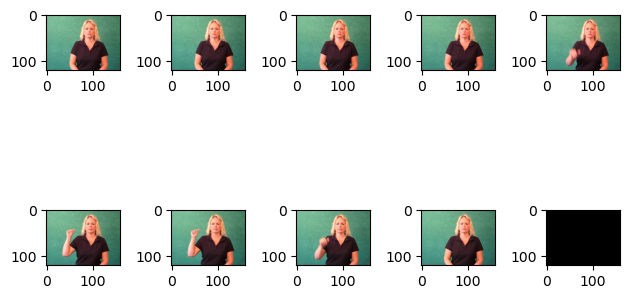

In [ ]:
for i in range(0,10)
    plt.subplot(2,5,i+1);
    plt.imshow(x[i]);
    plt.axis('off')
plt.tight_layout()
plt.show();

Most of action is performed in the middle of the video (usually).

Sometimes first and last frames are black (bad dataset)

https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly

## Loading dataset in batches by using Python generator

In [691]:
from tensorflow.keras.utils import to_categorical
number_of_words = len(words)
def data_generator():
    for video_id in selected_df.video_id.to_list():
        gloss = selected_df[selected_df['video_id'] == video_id].gloss.item()
        video_id = str(video_id).zfill(5)
        path = f'./keys_dataset/{gloss}/{video_id}.npy'
        x = np.load(path)
        if x.shape[0] != 10: # hot fix, x shape should be (10,1662)
            x_p = np.zeros((10,1662))
            x_p[:x.shape[0],:] = x
            x = x_p
        y = words.index(gloss)
        y = to_categorical(y, num_classes=number_of_words, dtype='float32')
        yield x, y

In [716]:
import tensorflow as tf

ds_series = tf.data.Dataset.from_generator(
    data_generator, 
    output_types=(tf.float32, tf.int32), 
    output_shapes=((10, 1662), (95,)))

ds_series

<FlatMapDataset element_spec=(TensorSpec(shape=(10, 1662), dtype=tf.float32, name=None), TensorSpec(shape=(95,), dtype=tf.int32, name=None))>

In [717]:
ds_series_batch = ds_series.shuffle(20).padded_batch(32)

x, y = next(iter(ds_series_batch))
input_shape = x.numpy().shape
input_shape

(32, 10, 1662)

In [ ]:
ds = ds_series.batch(32)
for batch in ds:
    x,y = batch
    model.fit(x,y)

In [694]:
print(y.numpy().shape)

(32, 95)


## Training models

In [699]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=input_shape[1:]))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(95, activation='softmax')) 

In [700]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-3,), loss='categorical_crossentropy', metrics=['acc'])

In [701]:
print(model.summary())

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 10, 256)           425728    
                                                                 
 dense_44 (Dense)            (None, 10, 256)           65792     
                                                                 
 dropout_10 (Dropout)        (None, 10, 256)           0         
                                                                 
 dense_45 (Dense)            (None, 10, 256)           65792     
                                                                 
 flatten_5 (Flatten)         (None, 2560)              0         
                                                                 
 dense_46 (Dense)            (None, 95)                243295    
                                                                 
Total params: 800,607
Trainable params: 800,607
Non-t

In [621]:
model.fit(ds_series_batch, epochs=30,)

Epoch 1/30
22/22 [==============================] - 1s 37ms/step - loss: 4.7967 - acc: 0.0030
Epoch 2/30
22/22 [==============================] - 1s 36ms/step - loss: 4.7540 - acc: 0.0193
Epoch 3/30
22/22 [==============================] - 1s 36ms/step - loss: 4.5548 - acc: 0.0222
Epoch 4/30
22/22 [==============================] - 1s 36ms/step - loss: 4.5535 - acc: 0.0178
Epoch 5/30
22/22 [==============================] - 1s 36ms/step - loss: 4.5518 - acc: 0.0222
Epoch 6/30
22/22 [==============================] - 1s 36ms/step - loss: 4.7033 - acc: 0.0415
Epoch 7/30
22/22 [==============================] - 1s 36ms/step - loss: 4.5507 - acc: 0.0237
Epoch 8/30
22/22 [==============================] - 1s 36ms/step - loss: 4.5497 - acc: 0.0237
Epoch 9/30
22/22 [==============================] - 1s 36ms/step - loss: 4.6295 - acc: 0.0237
Epoch 10/30
22/22 [==============================] - 1s 36ms/step - loss: 4.5487 - acc: 0.0237
Epoch 11/30
22/22 [==============================] - 1s 36m

### Model consists only Dense layers

In [710]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv1D(1662, 10, activation='relu', input_shape=input_shape[1:])) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(95, activation='softmax')) 
# model.add(layers.MaxPooling1D(2)) 
# model.add(layers.Conv1D(64, 3, activation='relu')) 
# model.add(layers.GlobalMaxPooling1D()) 
# model.add(layers.Dense(95, activation='sigmoid'))

In [723]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-3,), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [712]:
print(model.summary())

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_37 (Conv1D)          (None, 1, 1662)           27624102  
                                                                 
 dense_55 (Dense)            (None, 1, 256)            425728    
                                                                 
 dense_56 (Dense)            (None, 1, 256)            65792     
                                                                 
 dropout_13 (Dropout)        (None, 1, 256)            0         
                                                                 
 dense_57 (Dense)            (None, 1, 256)            65792     
                                                                 
 flatten_8 (Flatten)         (None, 256)               0         
                                                                 
 dense_58 (Dense)            (None, 95)              

In [713]:
model.fit(ds_series_batch, epochs=30,)

Epoch 1/30
22/22 [==============================] - 2s 75ms/step - loss: 6.4968 - acc: 0.0163
Epoch 2/30
22/22 [==============================] - 2s 70ms/step - loss: 4.9010 - acc: 0.0059
Epoch 3/30
22/22 [==============================] - 2s 69ms/step - loss: 4.6824 - acc: 0.0133
Epoch 4/30
22/22 [==============================] - 2s 69ms/step - loss: 4.6217 - acc: 0.0222
Epoch 5/30
22/22 [==============================] - 2s 69ms/step - loss: 4.5742 - acc: 0.0193
Epoch 6/30
22/22 [==============================] - 2s 69ms/step - loss: 4.7115 - acc: 0.0089
Epoch 7/30
22/22 [==============================] - 2s 70ms/step - loss: 4.7130 - acc: 0.0133
Epoch 8/30
22/22 [==============================] - 2s 69ms/step - loss: 4.6294 - acc: 0.0089
Epoch 9/30
22/22 [==============================] - 2s 69ms/step - loss: 4.7217 - acc: 0.0119
Epoch 10/30
22/22 [==============================] - 2s 69ms/step - loss: 4.6437 - acc: 0.0044
Epoch 11/30
22/22 [==============================] - 2s 69m

### Model consists LSTM and Dense layers

In [718]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard

In [720]:
log_dir = '/home/jupyter/sign_language_gesture_recognition/logs'
tensor_board = TensorBoard(log_dir = log_dir)

In [722]:
model = models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape[1:])) 
model.add(layers.LSTM(128, return_sequences=True)) 
model.add(layers.LSTM(64, return_sequences=False))           
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))          
model.add(layers.Dense(95, activation='softmax'))

In [724]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-3,), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [725]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 10, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_59 (Dense)            (None, 128)               8320      
                                                                 
 dense_60 (Dense)            (None, 128)               16512     
                                                                 
 dense_61 (Dense)            (None, 95)                12255     
                                                                 
Total params: 627,423
Trainable params: 627,423
Non-t

In [727]:
model.fit(ds_series_batch, epochs=500, callbacks=[tensor_board])

Epoch 1/500
22/22 [==============================] - 1s 54ms/step - loss: 4.5533 - categorical_accuracy: 0.0222
Epoch 2/500
22/22 [==============================] - 1s 53ms/step - loss: 4.5058 - categorical_accuracy: 0.0222
Epoch 3/500
22/22 [==============================] - 1s 53ms/step - loss: 4.5102 - categorical_accuracy: 0.0222
Epoch 4/500
22/22 [==============================] - 1s 53ms/step - loss: 4.5142 - categorical_accuracy: 0.0222
Epoch 5/500
22/22 [==============================] - 1s 53ms/step - loss: 4.5146 - categorical_accuracy: 0.0222
Epoch 6/500
22/22 [==============================] - 1s 54ms/step - loss: 4.5146 - categorical_accuracy: 0.0222
Epoch 7/500
22/22 [==============================] - 1s 54ms/step - loss: 4.5121 - categorical_accuracy: 0.0222
Epoch 8/500
22/22 [==============================] - 1s 54ms/step - loss: 4.5120 - categorical_accuracy: 0.0222
Epoch 9/500
22/22 [==============================] - 1s 54ms/step - loss: 4.5136 - categorical_accuracy:

KeyboardInterrupt: 

### Model based on images consists CNN 1D/2D layers. (?)

For this task author used CNN 1D due to bad understanding of the method. After meeting with TA author knows Conv2D could do the job.

```python
# With extended batch shape [4, 7]:
input_shape = (4, 7, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(
2, 3, activation='relu', input_shape=input_shape[2:])(x)
print(y.shape)
```
[Source](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

In [7]:
def img_generator():
    for video_id in selected_df.video_id.to_list():
        gloss = selected_df[selected_df['video_id'] == video_id].gloss.item()
        video_id = str(video_id).zfill(5)
        path = f'./selected_dataset/{gloss}/{video_id}.npy'
        x = np.load(path)
        if x.shape[0] != 10: # hot fix, x shape should be (10,1662)
            x_p = np.zeros((10, 120, 160, 3))
            x_p[:x.shape[0],:] = x
            x = x_p
        y = words.index(gloss)
        y = to_categorical(y, num_classes=number_of_words, dtype='float32')
        yield x, y

In [677]:
import tensorflow as tf

ds_series = tf.data.Dataset.from_generator(
    img_generator, 
    output_types=(tf.int32, tf.int32), 
    output_shapes=((10, 120, 160, 3), (95,)))

ds_series

<FlatMapDataset element_spec=(TensorSpec(shape=(10, 120, 160, 3), dtype=tf.int32, name=None), TensorSpec(shape=(95,), dtype=tf.int32, name=None))>

In [679]:
ds_series_batch = ds_series.shuffle(20).padded_batch(7)

x, y = next(iter(ds_series_batch))
input_shape = x.numpy().shape

In [680]:
input_shape

(7, 10, 120, 160, 3)

In [690]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv1D(32, 10, activation='relu', input_shape=input_shape[2:], data_format="channels_last"))
model.add(layers.MaxPooling2D(pool_size=(1,2))) 
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.GlobalMaxPooling1D()) 
model.add(layers.Dense(95, activation='sigmoid'))

ValueError: Input 0 of layer "max_pooling2d" is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, 10, 120, 151, 32)

In [687]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-3,), loss='categorical_crossentropy', metrics=['acc'])

In [688]:
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 10, 120, 151, 32)  992       
                                                                 
Total params: 992
Trainable params: 992
Non-trainable params: 0
_________________________________________________________________
None


## Reduction of dataset to letters only

In [733]:
set_of_letters = set(
    ['a','b','d','e','f','g','h','i','j','k','m','o','p','r','s','t','u','v','w'])

In [756]:
number_of_letters = len(set_of_letters)

In [749]:
l_df = f_df[f_df['gloss'].isin(set_of_letters)]

In [750]:
len(l_df)

76

In [751]:
l_df

,gloss,video_id
8740,a,66039
8741,a,1610
8742,a,1612
8743,a,1615
8910,b,66040
...,...,...
11909,v,61565
11956,w,66061
11957,w,63274
11958,w,63276


In [732]:
np.sum(wlas_df['gloss'].isin(set_of_letters))

19

In [760]:
letters = l_df['gloss'].unique().tolist()

In [761]:
letters

['a',
 'b',
 'p',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'm',
 'o',
 'r',
 's',
 't',
 'u',
 'v',
 'w']

In [774]:
from tensorflow.keras.utils import to_categorical
def data_generator():
    for video_id in l_df.video_id.to_list():
        gloss = l_df[l_df['video_id'] == video_id].gloss.item()
        video_id = str(video_id).zfill(5)
        path = f'/home/jupyter/sign_language_gesture_recognition/letter_keys_dataset/{gloss}/{video_id}.npy'
        x = np.load(path)
        if x.shape[0] != 10: # hot fix, x shape should be (10,1662)
            x_p = np.zeros((10,1662))
            x_p[:x.shape[0],:] = x
            x = x_p
        y = letters.index(gloss)
        y = to_categorical(y, num_classes=number_of_letters, dtype='float32')
        yield x, y

In [775]:
import tensorflow as tf

ds_series = tf.data.Dataset.from_generator(
    data_generator, 
    output_types=(tf.float32, tf.int32), 
    output_shapes=((10, 1662), (19,)))

ds_series

<FlatMapDataset element_spec=(TensorSpec(shape=(10, 1662), dtype=tf.float32, name=None), TensorSpec(shape=(19,), dtype=tf.int32, name=None))>

In [776]:
ds_series_batch = ds_series.shuffle(20).padded_batch(32)

x, y = next(iter(ds_series_batch))
input_shape = x.numpy().shape
input_shape

(32, 10, 1662)

In [777]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [778]:
model = models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape[1:])) 
model.add(layers.LSTM(128, return_sequences=True)) 
model.add(layers.LSTM(64, return_sequences=False))           
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))          
model.add(layers.Dense(19, activation='softmax'))

In [779]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-3,), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [780]:
model.fit(ds_series_batch, epochs=50, callbacks=[tensor_board])

Epoch 1/50
3/3 [==============================] - 4s 48ms/step - loss: 2.9538 - categorical_accuracy: 0.0132
Epoch 2/50
3/3 [==============================] - 0s 37ms/step - loss: 2.9595 - categorical_accuracy: 0.0263
Epoch 3/50
3/3 [==============================] - 0s 38ms/step - loss: 2.9522 - categorical_accuracy: 0.0658
Epoch 4/50
3/3 [==============================] - 0s 42ms/step - loss: 2.9561 - categorical_accuracy: 0.0526
Epoch 5/50
3/3 [==============================] - 0s 36ms/step - loss: 2.9571 - categorical_accuracy: 0.0526
Epoch 6/50
3/3 [==============================] - 0s 37ms/step - loss: 2.9561 - categorical_accuracy: 0.0526
Epoch 7/50
3/3 [==============================] - 0s 36ms/step - loss: 2.9613 - categorical_accuracy: 0.0526
Epoch 8/50
3/3 [==============================] - 0s 37ms/step - loss: 2.9606 - categorical_accuracy: 0.0526
Epoch 9/50
3/3 [==============================] - 0s 38ms/step - loss: 2.9546 - categorical_accuracy: 0.0526
Epoch 10/50
3/3 [==

Model is not learning. Training accuracy is equal to 1/19, i.e. random guess. There are only four examples per letter, not enough to train the model.

In [173]:
pip install pipreqs

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=8b00240bcd93c459a7ec64d3238d7fbe20482f431be8bbcca8f65ae639661ac5
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\fc\ab\d4\5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\GitHub\sign_language_gesture_recognition\sign\Scripts\python.exe -m pip install --upgrade pip' command.


In [176]:
!pipreqs ./

INFO: Successfully saved requirements file in ./requirements.txt


Materials:
- [Keras documentation on video classification](https://keras.io/examples/vision/video_classification/)
- [Tensorflow documentation on getting data from generator](https://www.tensorflow.org/guide/data)